Isurance Project

#Motivation for this Insurance proj

### Motivation for Choosing the Insurance Cost Prediction Project

The motivation behind selecting the Insurance Cost Prediction project stems from the critical need for accuracy and precision in the insurance industry. Traditional methods of predicting insurance costs often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. This project aims to leverage machine learning techniques to enhance the accuracy of insurance cost predictions, leading to more competitive pricing and better risk management.

### Key Motivations:

1. **Enhance Precision in Pricing**:
   - By using individual data points, the project aims to determine premiums that reflect actual risk more closely than generic estimates. This precision can lead to fairer pricing for policyholders and more accurate risk assessments for insurers.

2. **Increase Competitiveness**:
   - Accurate predictions enable insurers to offer rates that are attractive to consumers while ensuring that the pricing is sustainable. This competitive edge can help insurers retain and attract more customers.

3. **Improve Customer Satisfaction**:
   - Fair and transparent pricing based on personal health data can increase trust and satisfaction among policyholders. Customers are more likely to feel valued and understood when their premiums are tailored to their specific health profiles.

4. **Enable Personalized Offerings**:
   - The project allows for the creation of customized insurance packages based on predicted costs. These personalized offerings can cater more directly to the needs and preferences of individuals, enhancing the overall customer experience.

5. **Risk Assessment**:
   - Insurers can use the model to refine their risk assessment processes, identifying key factors that influence costs most significantly. This can lead to more informed decision-making and better management of potential risks.

6. **Policy Development**:
   - Insights gained from the model can inform the development of new insurance products or adjustments to existing ones. This adaptability ensures that insurers can meet the evolving needs of their customers.

7. **Strategic Decision Making**:
   - Predictive analytics can aid in broader strategic decisions, such as entering new markets or adjusting policy terms based on risk predictions. This strategic foresight can drive growth and innovation within the company.

8. **Customer Engagement**:
   - Insights from the model can be used in customer engagement initiatives, such as personalized marketing and tailored advice for policyholders. This proactive approach can strengthen customer relationships and loyalty.

### Data Description

The dataset comprises the following 11 attributes:
- **Age**: Numeric, ranging from 18 to 66 years.
- **Diabetes**: Binary (0 or 1), where 1 indicates the presence of diabetes.
- **BloodPressureProblems**: Binary (0 or 1), indicating the presence of blood pressure-related issues.
- **AnyTransplants**: Binary (0 or 1), where 1 indicates the person has had a transplant.
- **AnyChronicDiseases**: Binary (0 or 1), indicating the presence of any chronic diseases.
- **Height**: Numeric, measured in centimeters, ranging from 145 cm to 188 cm.
- **Weight**: Numeric, measured in kilograms, ranging from 51 kg to 132 kg.
- **KnownAllergies**: Binary (0 or 1), where 1 indicates known allergies.
- **HistoryOfCancerInFamily**: Binary (0 or 1), indicating a family history of cancer.
- **NumberOfMajorSurgeries**: Numeric, counting the number of major surgeries, ranging from 0 to 3 surgeries.
- **PremiumPrice**: Numeric, representing the premium price in currency, ranging from 15,000 to 40,000.

By leveraging this dataset, the project aims to build a robust machine learning model that can accurately predict insurance costs, ultimately benefiting both insurers and policyholders.

#EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [7]:
pip install streamlit
pip install statsmodels

SyntaxError: invalid syntax (552104721.py, line 2)

In [5]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm, zscore,ttest_ind, f_oneway, pearsonr
from scipy.stats import shapiro, kstest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pickle
import streamlit as st


ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
df = pd.read_csv("insurance.csv")

In [278]:
df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1         23000  
3                       2         28000  
4                       1         23000

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


*Note: " .T " gives a transpose of all the dataframes if required.*

In [280]:
df.describe(include='all').T

count          mean          std      min      25%  \
Age                      986.0     41.745436    13.963371     18.0     30.0   
Diabetes                 986.0      0.419878     0.493789      0.0      0.0   
BloodPressureProblems    986.0      0.468560     0.499264      0.0      0.0   
AnyTransplants           986.0      0.055781     0.229615      0.0      0.0   
AnyChronicDiseases       986.0      0.180527     0.384821      0.0      0.0   
Height                   986.0    168.182556    10.098155    145.0    161.0   
Weight                   986.0     76.950304    14.265096     51.0     67.0   
KnownAllergies           986.0      0.215010     0.411038      0.0      0.0   
HistoryOfCancerInFamily  986.0      0.117647     0.322353      0.0      0.0   
NumberOfMajorSurgeries   986.0      0.667343     0.749205      0.0      0.0   
PremiumPrice             986.0  24336.713996  6248.184382  15000.0  21000.0   

                             50%      75%      max  
Age                         42.0     53.0     66.0  
Diabetes                     0.0      1.0      1.0  
BloodPressureProblems        0.0      1.0      1.0  
AnyTransplants               0.0      0.0      1.0  
AnyChronicDiseases           0.0      0.0      1.0  
Height                     168.0    176.0    188.0  
Weight                      75.0     87.0    132.0  
KnownAllergies               0.0      0.0      1.0  
HistoryOfCancerInFamily      0.0      0.0      1.0  
NumberOfMajorSurgeries       1.0      1.0      3.0  
PremiumPrice             23000.0  28000.0  40000.0

In [281]:
original_df_count = df.shape[0]
df.shape

(986, 11)

###Change the datatypes to appropriate continuous and categorical values.

In [282]:
# # Convert 'Diabetes' column to categorical
# df['Diabetes'] = df['Diabetes'].astype('category')

# # Verify the change
# print("Data Type : ", df['Diabetes'].dtypes)
# print("Counts : ", df['Diabetes'].value_counts())

In [283]:
# # Convert binary columns to categorical
# binary_columns = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']
# for column in binary_columns:
#     df[column] = df[column].astype('category')

# # Count the number of occurrences of each category for binary columns
# for column in binary_columns:
#     print(f"Counts for {column}:\n{df[column].value_counts()}\n")


NumberOfMajorSurgeries

In [284]:
# # Convert 'NumberOfMajorSurgeries' column to categorical
# df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].astype('category')

# # Verify the change
# print(df['NumberOfMajorSurgeries'].dtypes)

# # Count occurrences of each value
# surgery_counts = df['NumberOfMajorSurgeries'].value_counts()
# print(surgery_counts)


In [285]:
df.describe(include='all').T

count          mean          std      min      25%  \
Age                      986.0     41.745436    13.963371     18.0     30.0   
Diabetes                 986.0      0.419878     0.493789      0.0      0.0   
BloodPressureProblems    986.0      0.468560     0.499264      0.0      0.0   
AnyTransplants           986.0      0.055781     0.229615      0.0      0.0   
AnyChronicDiseases       986.0      0.180527     0.384821      0.0      0.0   
Height                   986.0    168.182556    10.098155    145.0    161.0   
Weight                   986.0     76.950304    14.265096     51.0     67.0   
KnownAllergies           986.0      0.215010     0.411038      0.0      0.0   
HistoryOfCancerInFamily  986.0      0.117647     0.322353      0.0      0.0   
NumberOfMajorSurgeries   986.0      0.667343     0.749205      0.0      0.0   
PremiumPrice             986.0  24336.713996  6248.184382  15000.0  21000.0   

                             50%      75%      max  
Age                         42.0     53.0     66.0  
Diabetes                     0.0      1.0      1.0  
BloodPressureProblems        0.0      1.0      1.0  
AnyTransplants               0.0      0.0      1.0  
AnyChronicDiseases           0.0      0.0      1.0  
Height                     168.0    176.0    188.0  
Weight                      75.0     87.0    132.0  
KnownAllergies               0.0      0.0      1.0  
HistoryOfCancerInFamily      0.0      0.0      1.0  
NumberOfMajorSurgeries       1.0      1.0      3.0  
PremiumPrice             23000.0  28000.0  40000.0

###Checking Null Values

In [286]:
null_counts = df.isnull().sum()
print("Null values in each column:\n", null_counts)


Null values in each column:
 Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


###Cleck Outliers

In [287]:
df_outliers = df[['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']]
print(df.shape)

# Function to detect outliers using IQR
def detect_outliers(df_outliers):
    outliers = pd.DataFrame()
    for column in df_outliers.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_outliers[column].quantile(0.25)
        Q3 = df_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_in_column = df_outliers[(df_outliers[column] < lower_bound) | (df_outliers[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])
    return outliers

# Detect outliers
outliers = detect_outliers(df_outliers)
print("Outliers detected:\n", outliers)



(986, 11)
Outliers detected:
      Age  Height  Weight  NumberOfMajorSurgeries  PremiumPrice
154   21     157     118                       1         15000
158   43     158     121                       0         23000
183   36     156     119                       0         23000
186   19     173     129                       0         15000
192   50     163     127                       2         28000
195   19     164     132                       0         15000
196   39     174     120                       0         23000
203   24     173     128                       1         26000
204   27     159     120                       1         39000
207   18     172     123                       1         15000
217   65     177     126                       2         24000
218   62     164     121                       1         38000
221   61     174     118                       1         35000
225   57     160     128                       0         35000
227   44     182     124 

In [288]:
if original_df_count == df.shape[0]:
  df = df.drop(outliers.index, errors='ignore')
  print(df.shape)

(949, 11)


###Plots of all the parameters

Pair Plots

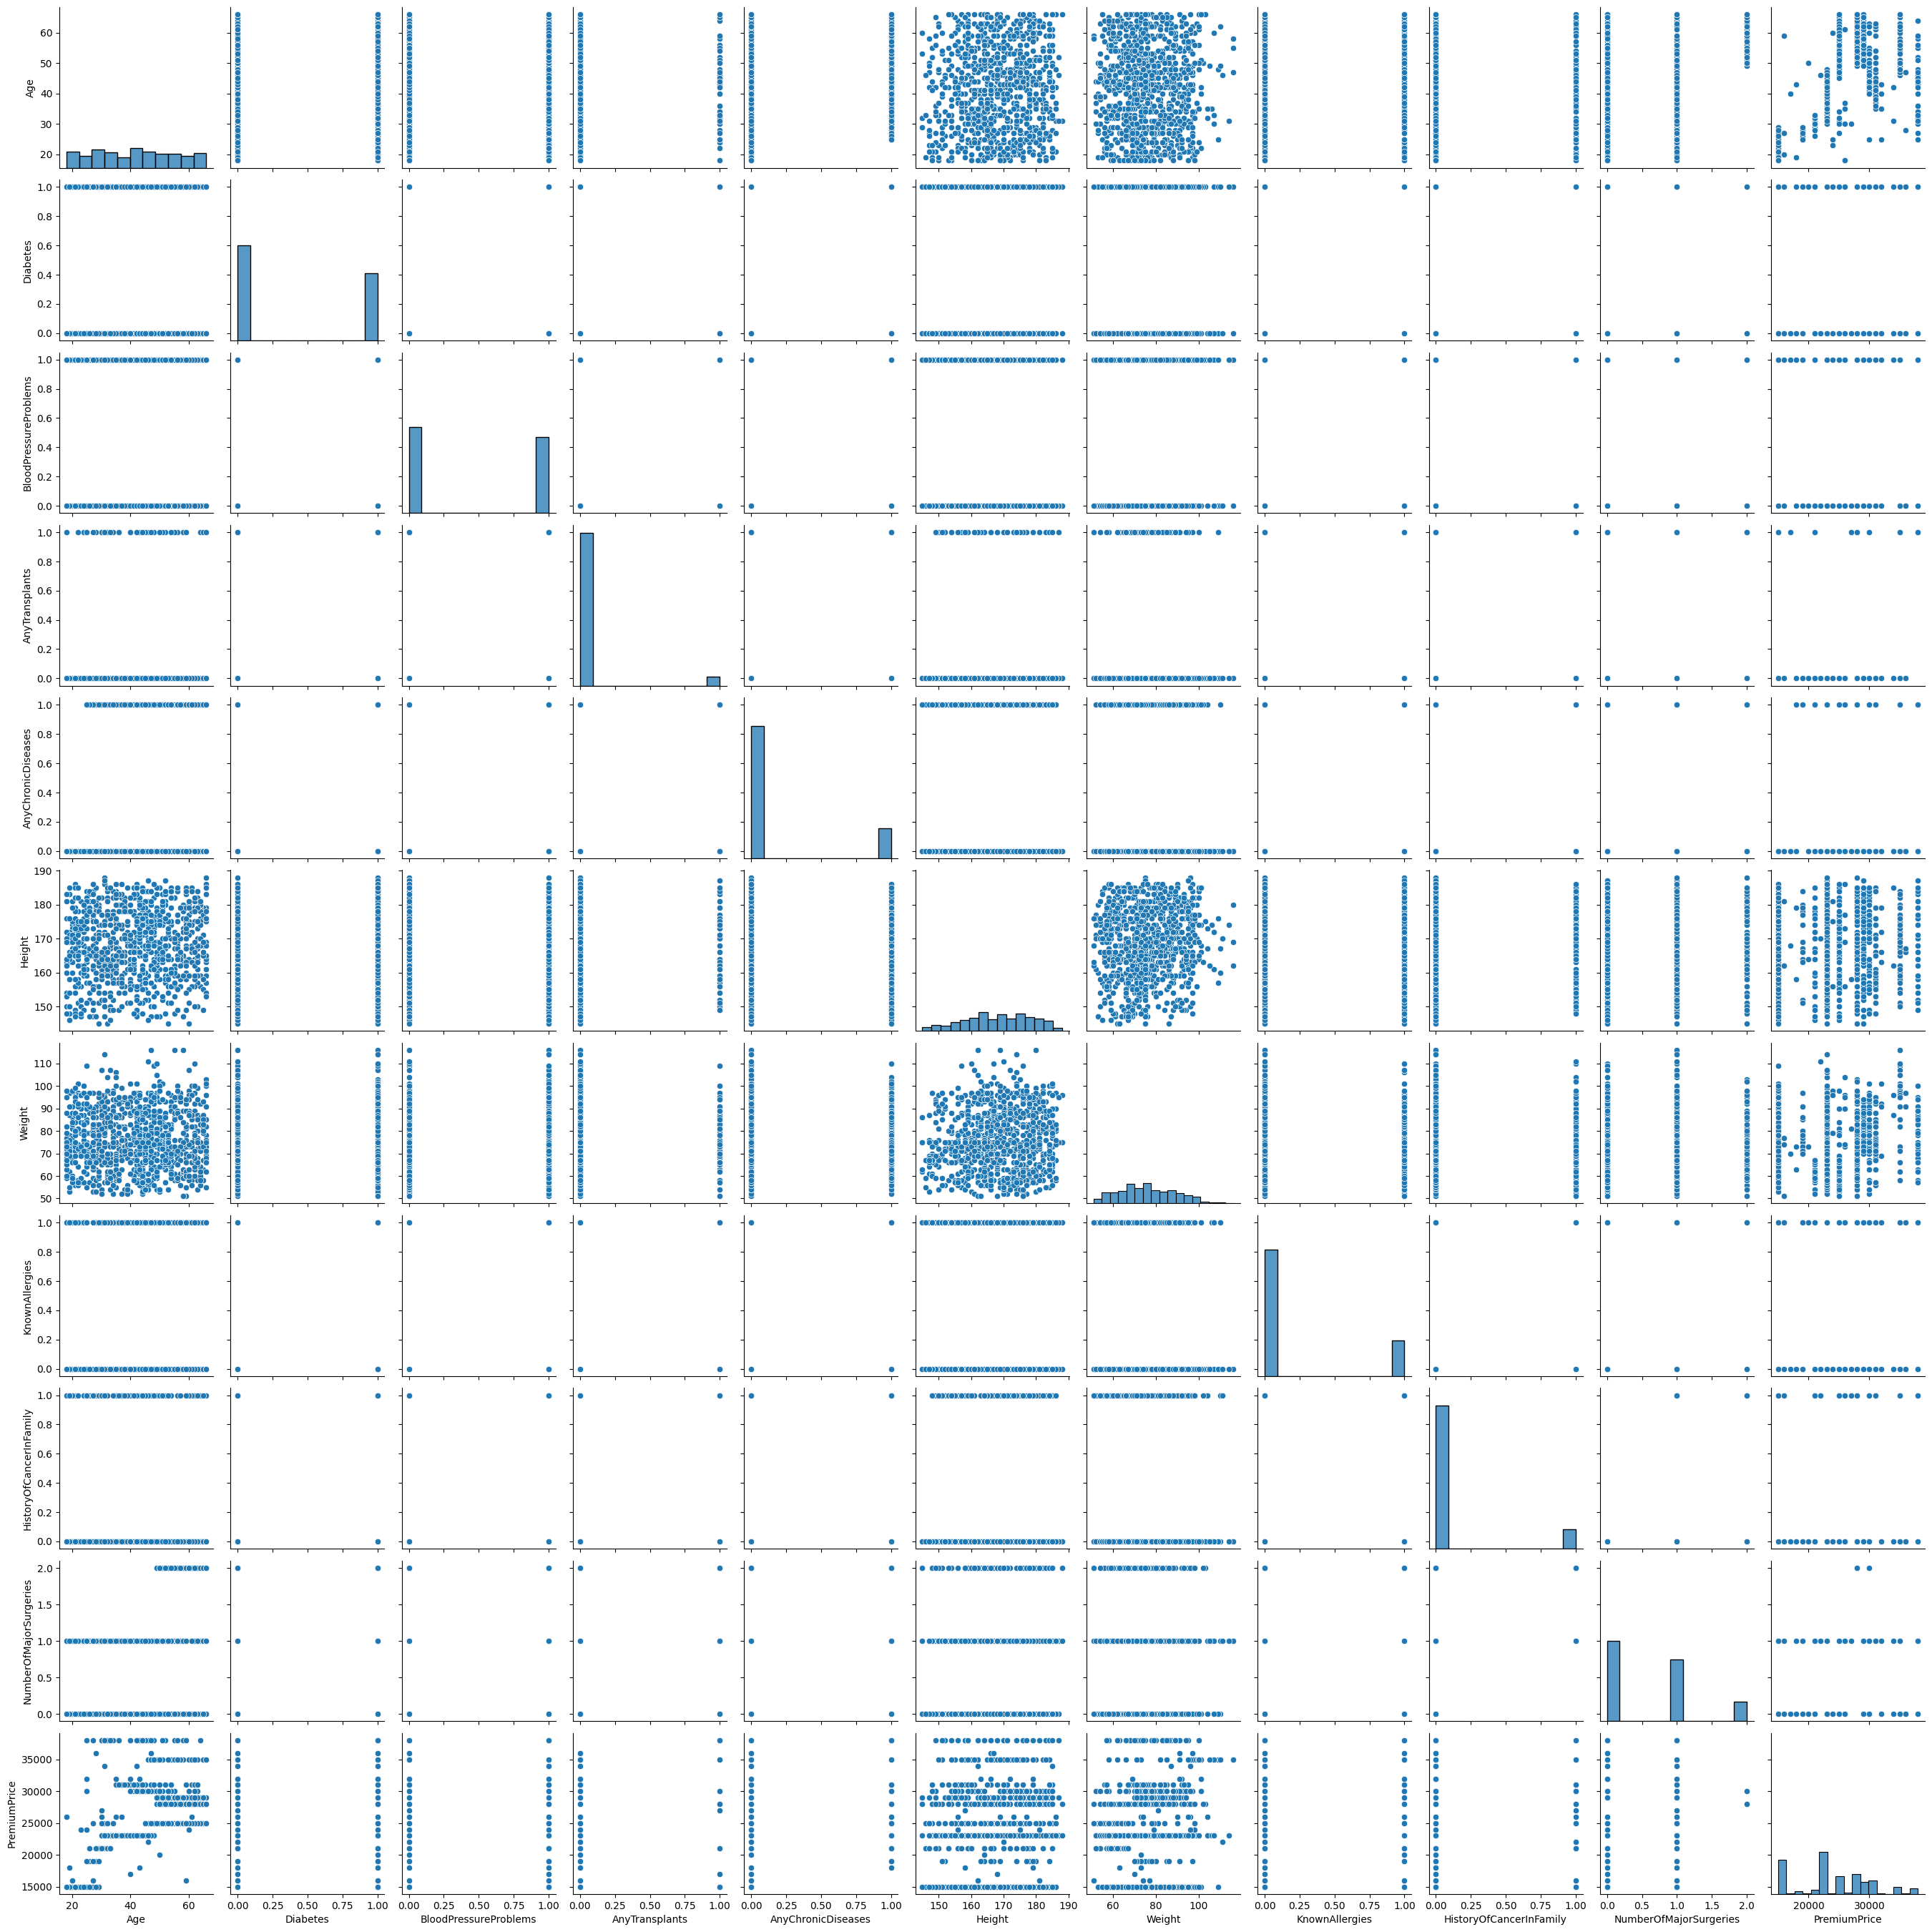

In [289]:
#Pair Plots
sns.pairplot(df)
plt.show()


Heat Map


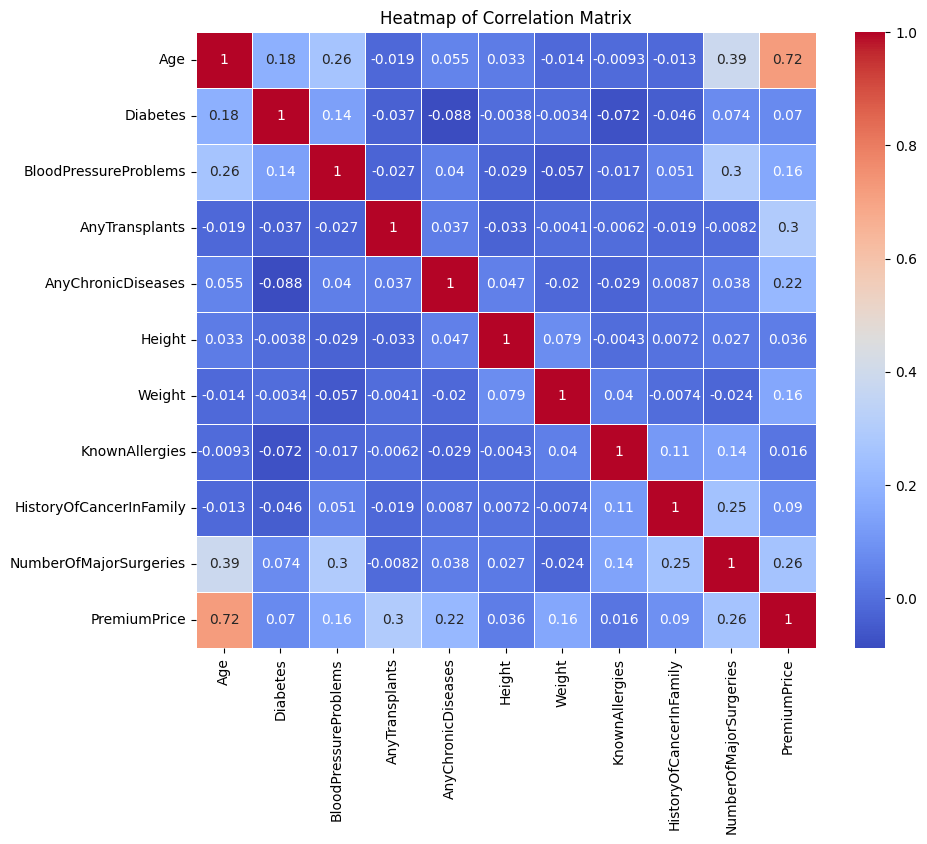

In [290]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


Age

In [291]:
df['Age'].describe(include='all').T

count    949.000000
mean      41.478398
std       13.701797
min       18.000000
25%       30.000000
50%       42.000000
75%       52.000000
max       66.000000
Name: Age, dtype: float64

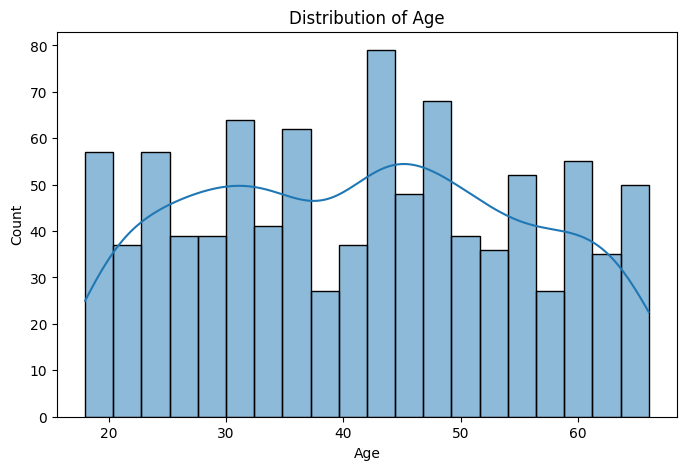

In [292]:
#Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title(f'Distribution of Age')
plt.show()


Height

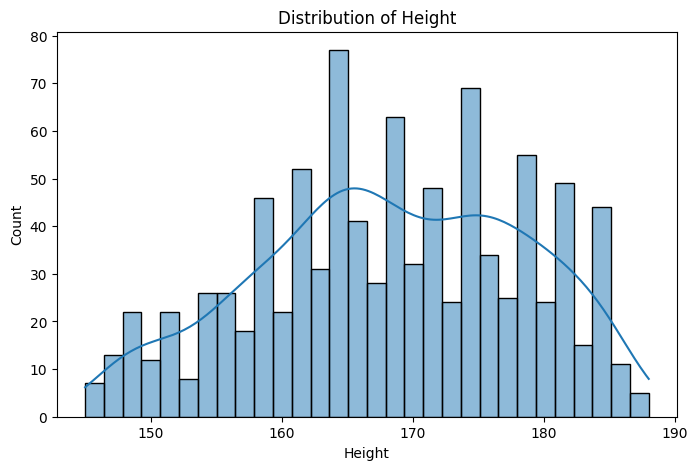

In [293]:
#Distribution of Height
plt.figure(figsize=(8, 5))
sns.histplot(df['Height'], kde=True, bins=30)
plt.title(f'Distribution of Height')
plt.show()

Weight

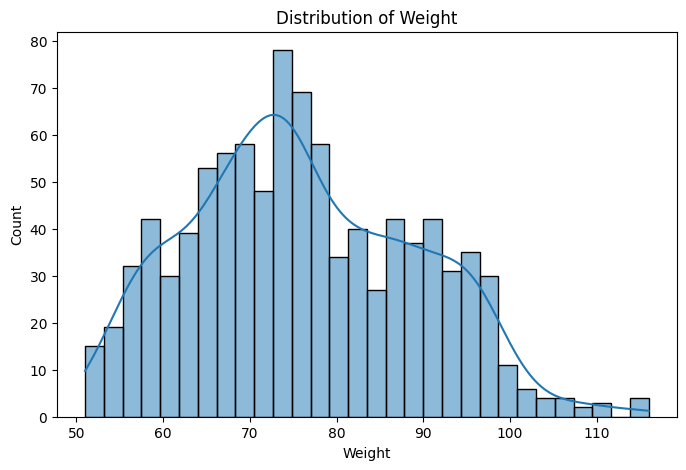

In [294]:
#Distribution of Weight
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight'], kde=True, bins=30)
plt.title(f'Distribution of Weight')
plt.show()

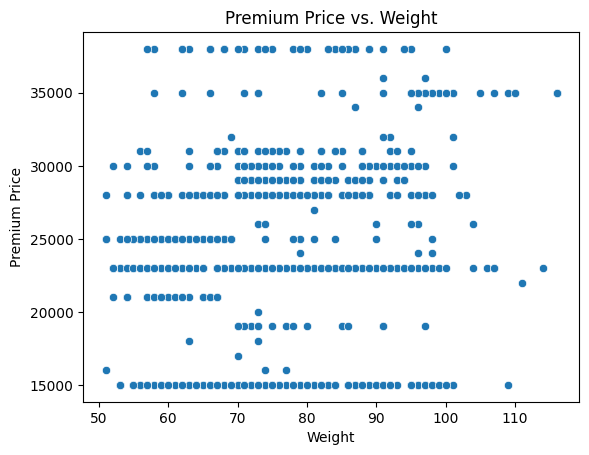

In [295]:
# Scatterplot for Weight and Premium Price
sns.scatterplot(x='Weight', y='PremiumPrice', data=df)
plt.title('Premium Price vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Premium Price')
plt.show()

Diabetes

In [296]:
df['Diabetes'].count()

949

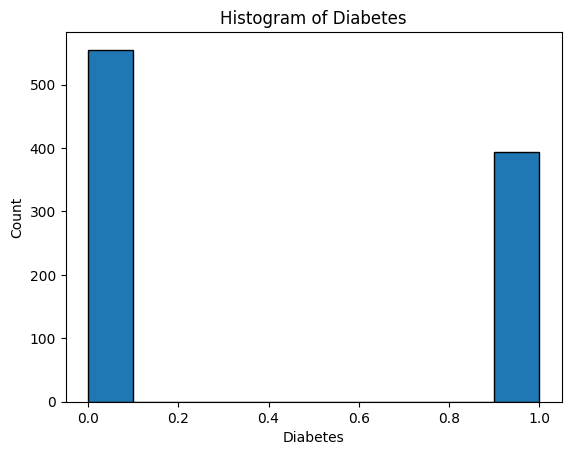

In [297]:
# Create histogram
plt.hist(df['Diabetes'], edgecolor='black')

# Add title and labels
plt.title('Histogram of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')

# Show plot
plt.show()


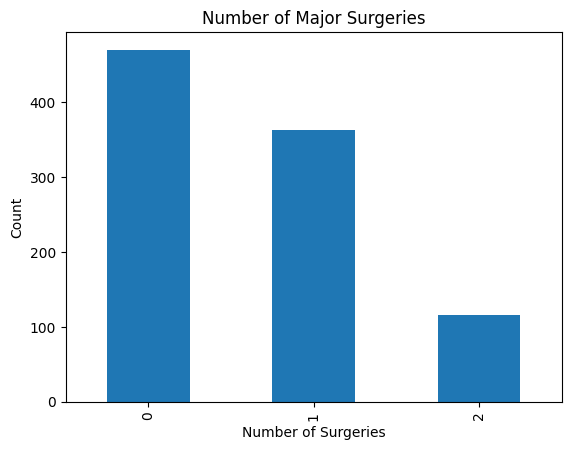

In [298]:
# Bar plot
df['NumberOfMajorSurgeries'].value_counts().plot(kind='bar')
plt.title('Number of Major Surgeries')
plt.xlabel('Number of Surgeries')
plt.ylabel('Count')
plt.show()


BOX PLOTS FOR ALL THE NUMERICAL VALUES

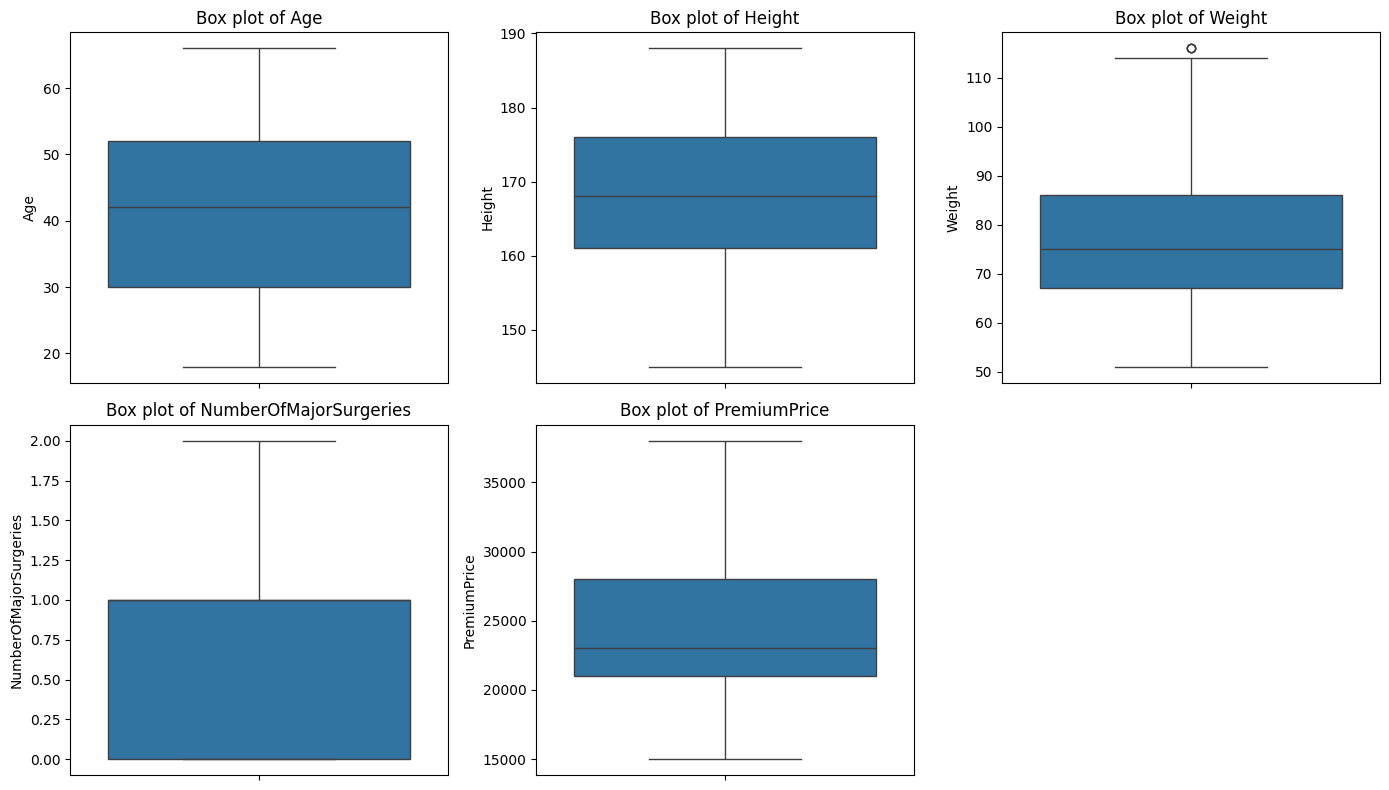

In [299]:
# List of numerical features to normalize
numerical_features = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']

plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

BMI Check

In [300]:
# Create BMI feature
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

In [301]:
# Summary statistics for BMI
print(df['BMI'].describe())

count    949.000000
mean      27.166030
std        5.483278
min       16.245274
25%       23.301095
50%       26.953125
75%       30.542829
max       44.284149
Name: BMI, dtype: float64


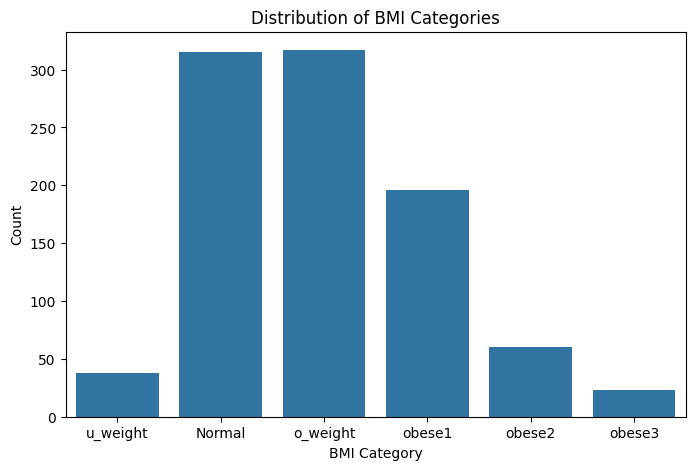

In [302]:
# Create BMI bins for better visualization
df['BMI_Binned'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.999, 29.999,34.999, 39.999, 44.999], labels=['u_weight', 'Normal', 'o_weight', 'obese1', 'obese2', 'obese3'])

# Plot column chart for BMI categories
plt.figure(figsize=(8, 5))
sns.countplot(x='BMI_Binned', data=df, order=['u_weight', 'Normal', 'o_weight', 'obese1', 'obese2', 'obese3'])
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

###Checking the imact of each parameter on Isurance Premium Price Base on ML Models

In [303]:
# Correlation with PremiumPrice
correlation = df['NumberOfMajorSurgeries'].corr(df['PremiumPrice'])
print("Correlation with PremiumPrice:", correlation)


Correlation with PremiumPrice: 0.25650189914566324


Model Coefficients (Slope): [ 3.41332287e+02 -3.25445005e+02 -6.72149167e+01  7.81443599e+03
  2.79946102e+03 -5.60181852e+00  8.15708116e+01 -9.45263141e+01
  2.44595391e+03 -5.87260791e+02]
Model Intercept: 4055.676722535951
R^2 Score: 0.6480708229079992


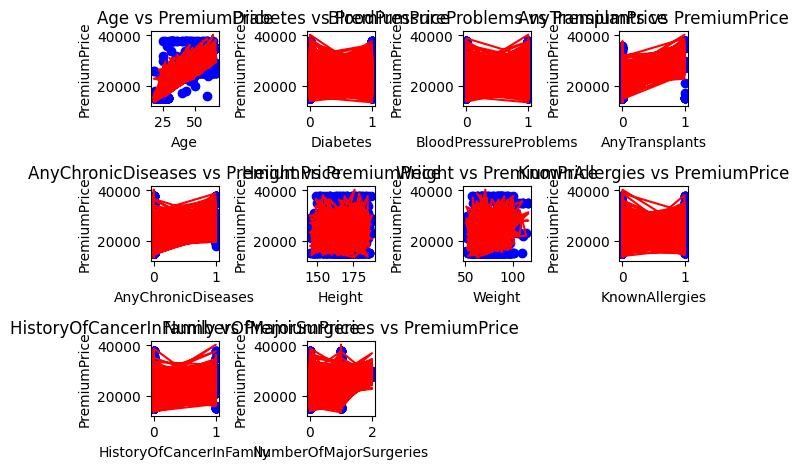

In [304]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df_copy = df.copy()

# Select relevant columns
X = df_copy[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
y = df_copy['PremiumPrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Coefficients (Slope):", model.coef_)
print("Model Intercept:", model.intercept_)
print("R^2 Score:", model.score(X_test, y_test))

# Plot each feature against PremiumPrice
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    plt.scatter(df[column], df['PremiumPrice'], color='blue')
    plt.plot(df[column], model.predict(df[X.columns]), color='red')
    plt.title(f'{column} vs PremiumPrice')
    plt.xlabel(column)
    plt.ylabel('PremiumPrice')

plt.tight_layout()
plt.show()



# Hypothesis Testing and Feature Engineering

Hypothesis Test : Diabetes and PremiumPrice

In [305]:
# Separate PremiumPrice based on the presence of Diabetes
diabetes_group = df[df['Diabetes'] == 1]['PremiumPrice']
non_diabetes_group = df[df['Diabetes'] == 0]['PremiumPrice']

# Perform an independent t-test
t_stat, p_value = ttest_ind(diabetes_group, non_diabetes_group, equal_var=False)

print("Hypothesis Test : Diabetes and PremiumPrice")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in premium price between individuals with and without diabetes")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in premium price between individuals with and without diabetes")


Hypothesis Test : Diabetes and PremiumPrice
T-statistic: 2.1964, P-value: 0.0283
Result: Reject the null hypothesis. There is a significant difference in premium price between individuals with and without diabetes


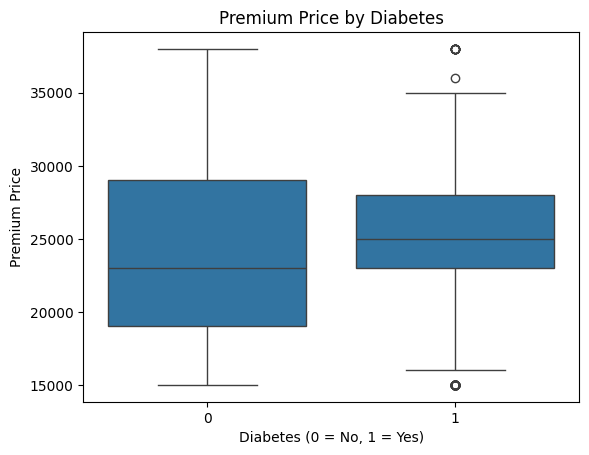

In [306]:
# Boxplot for Diabetes and Premium Price
sns.boxplot(x='Diabetes', y='PremiumPrice', data=df)
plt.title('Premium Price by Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()

Hypothesis Test : Chronic Diseases and premium price

In [307]:
# Separate premium price based on the presence of chronic diseases
with_chronic = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']
without_chronic = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']

# Perform an independent t-test
t_stat, p_value = ttest_ind(with_chronic, without_chronic, equal_var=False)

print("Hypothesis Test : Chronic Diseases and premium price")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis. premium price are significantly different for individuals with and without chronic diseases.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in premium price for individuals with and without chronic diseases.")


Hypothesis Test : Chronic Diseases and premium price
T-statistic: 7.9176, P-value: 0.0000
Result: Reject the null hypothesis. premium price are significantly different for individuals with and without chronic diseases.


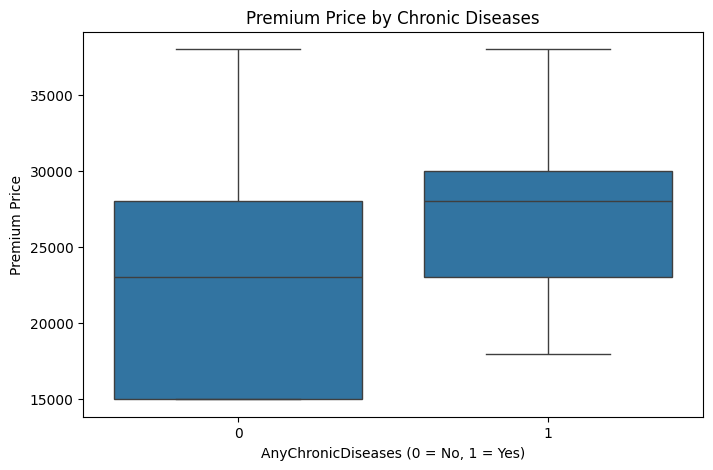

In [308]:
# Boxplot for AnyChronicDiseases and PremiumPrice
plt.figure(figsize=(8, 5))
sns.boxplot(x='AnyChronicDiseases', y='PremiumPrice', data=df)
plt.title('Premium Price by Chronic Diseases')
plt.xlabel('AnyChronicDiseases (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()

Hypothesis Test: BloodPressureProblems and Premium Price

In [309]:
# Separate premium price based on Blood Pressure Problems
group1 = df[df['BloodPressureProblems'] == 0]['PremiumPrice']  # Group without blood pressure problems
group2 = df[df['BloodPressureProblems'] == 1]['PremiumPrice']  # Group with blood pressure problems

# Perform an independent t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("Hypothesis Test: BloodPressureProblems and Premium Price")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in premium prices between groups.\n")
else:
    print("Result: No significant difference in premium prices between groups.\n")


Hypothesis Test: BloodPressureProblems and Premium Price
T-statistic: -5.1190, P-value: 0.0000
Result: Significant difference in premium prices between groups.



Hypothesis Test: AnyTransplants and Premium Price

In [310]:
# Separate premium price based on Any Transplants
group1 = df[df['AnyTransplants'] == 0]['PremiumPrice']  # Group without transplants
group2 = df[df['AnyTransplants'] == 1]['PremiumPrice']  # Group with transplants

# Perform an independent t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("Hypothesis Test: AnyTransplants and Premium Price")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in premium prices between groups.\n")
else:
    print("Result: No significant difference in premium prices between groups.\n")


Hypothesis Test: AnyTransplants and Premium Price
T-statistic: -6.1559, P-value: 0.0000
Result: Significant difference in premium prices between groups.



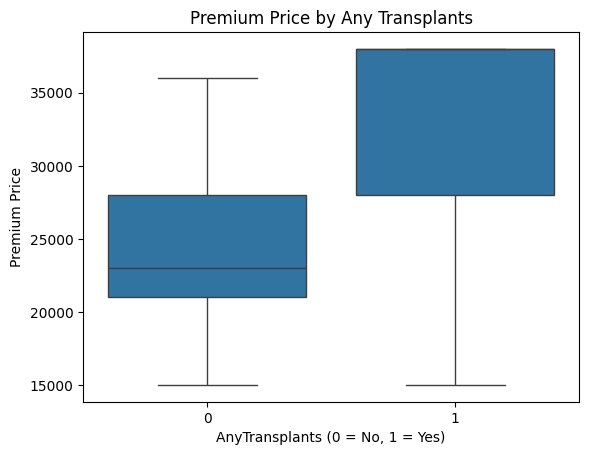

In [311]:
# Boxplot for AnyTransplants and PremiumPrice
sns.boxplot(x='AnyTransplants', y='PremiumPrice', data=df)
plt.title('Premium Price by Any Transplants')
plt.xlabel('AnyTransplants (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()


Hypothesis Test: KnownAllergies and Premium Price

In [312]:
# Separate premium price based on Known Allergies
group1 = df[df['KnownAllergies'] == 0]['PremiumPrice']  # Group without allergies
group2 = df[df['KnownAllergies'] == 1]['PremiumPrice']  # Group with allergies

# Perform an independent t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("Hypothesis Test: KnownAllergies and Premium Price")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in premium prices between groups.\n")
else:
    print("Result: No significant difference in premium prices between groups.\n")


Hypothesis Test: KnownAllergies and Premium Price
T-statistic: -0.4700, P-value: 0.6387
Result: No significant difference in premium prices between groups.



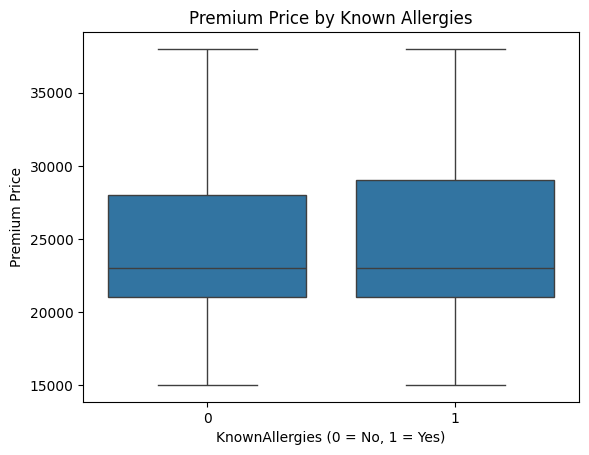

In [313]:
# Boxplot for KnownAllergies and PremiumPrice
sns.boxplot(x='KnownAllergies', y='PremiumPrice', data=df)
plt.title('Premium Price by Known Allergies')
plt.xlabel('KnownAllergies (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()

In [314]:
# Separate premium price based on History of Cancer in Family
group1 = df[df['HistoryOfCancerInFamily'] == 0]['PremiumPrice']  # Group without family history of cancer
group2 = df[df['HistoryOfCancerInFamily'] == 1]['PremiumPrice']  # Group with family history of cancer

# Perform an independent t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("Hypothesis Test: HistoryOfCancerInFamily and Premium Price")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in premium prices between groups.\n")
else:
    print("Result: No significant difference in premium prices between groups.\n")


Hypothesis Test: HistoryOfCancerInFamily and Premium Price
T-statistic: -2.5031, P-value: 0.0135
Result: Significant difference in premium prices between groups.



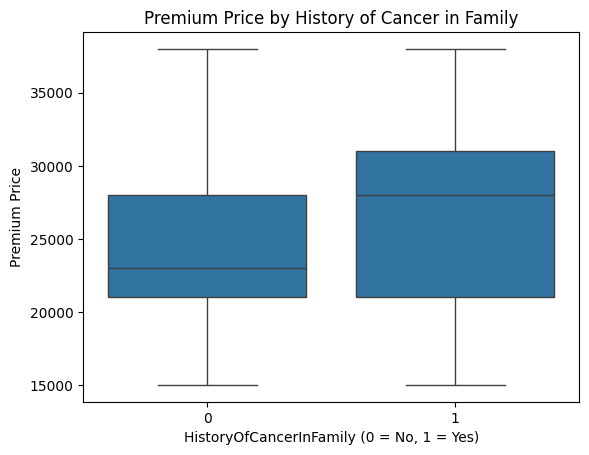

In [315]:
# Boxplot for HistoryOfCancerInFamily and PremiumPrice
sns.boxplot(x='HistoryOfCancerInFamily', y='PremiumPrice', data=df)
plt.title('Premium Price by History of Cancer in Family')
plt.xlabel('HistoryOfCancerInFamily (0 = No, 1 = Yes)')
plt.ylabel('Premium Price')
plt.show()

In [316]:
# Group premium price by the number of surgeries
grouped_by_surgeries = [df[df['NumberOfMajorSurgeries'] == i]['PremiumPrice'] for i in range(4)]

# Perform ANOVA
f_stat, p_value = f_oneway(*grouped_by_surgeries)

print("\nHypothesis Test : Number of Surgeries and premium price")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis. premium price vary significantly based on the number of surgeries.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in premium price based on the number of surgeries.")


Hypothesis Test : Number of Surgeries and premium price
F-statistic: nan, P-value: nan
Result: Fail to reject the null hypothesis. No significant difference in premium price based on the number of surgeries.


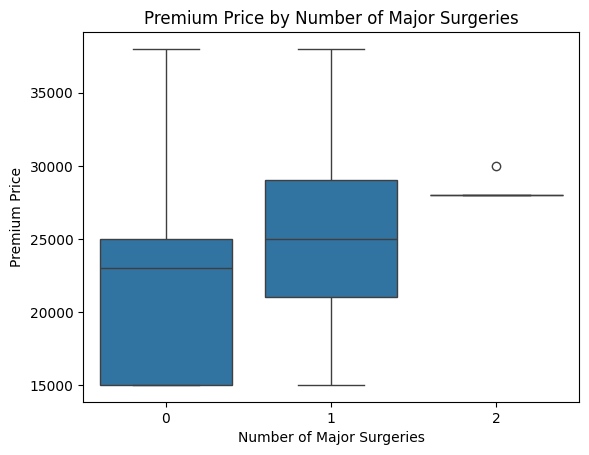

In [317]:
# Boxplot for Number of Major Surgeries and Premium Price
sns.boxplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=df)
plt.title('Premium Price by Number of Major Surgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Premium Price')
plt.show()

Hypothesis Test : Age and premium price

In [318]:
# Perform Pearson correlation
corr_coeff, p_value = pearsonr(df['Age'], df['PremiumPrice'])

print("\nHypothesis Test : Age and premium price")
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis. Age is significantly correlated with premium price.")
else:
    print("Result: Fail to reject the null hypothesis. No significant correlation between age and premium price.")



Hypothesis Test : Age and premium price
Pearson Correlation Coefficient: 0.7202, P-value: 0.0000
Result: Reject the null hypothesis. Age is significantly correlated with premium price.


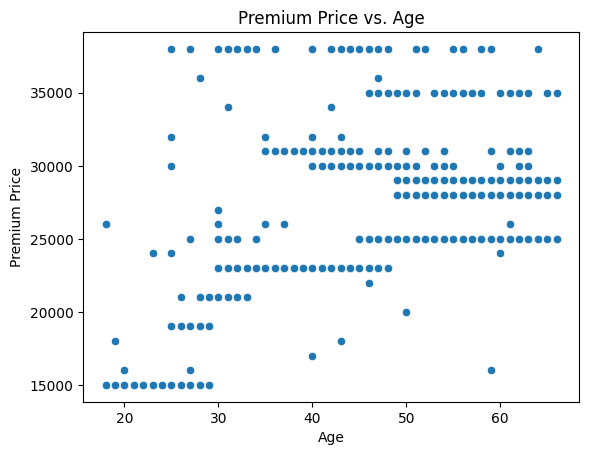

In [319]:
# Scatterplot for Age and Premium Price
sns.scatterplot(x='Age', y='PremiumPrice', data=df)
plt.title('Premium Price vs. Age')
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.show()

Hypothesis Test: Height and Premium Price

In [320]:
# Perform Pearson correlation
corr_coeff, p_value = pearsonr(df['Height'], df['PremiumPrice'])

print("Hypothesis Test: Height and Premium Price")
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant correlation between Height and PremiumPrice.\n")
else:
    print("Result: No significant correlation between Height and PremiumPrice.\n")


Hypothesis Test: Height and Premium Price
Pearson Correlation Coefficient: 0.0358, P-value: 0.2707
Result: No significant correlation between Height and PremiumPrice.



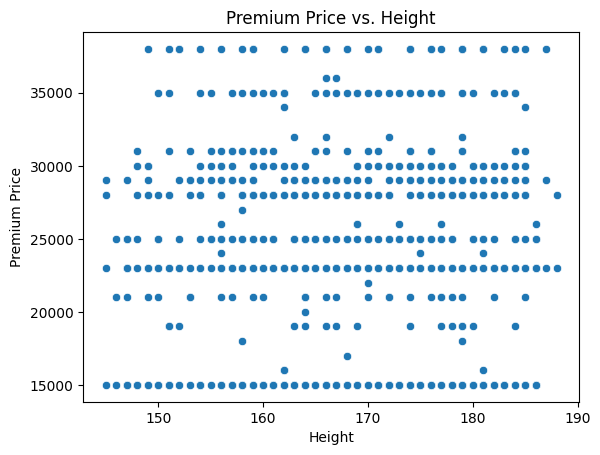

In [321]:
# Scatterplot for Height and Premium Price
sns.scatterplot(x='Height', y='PremiumPrice', data=df)
plt.title('Premium Price vs. Height')
plt.xlabel('Height')
plt.ylabel('Premium Price')
plt.show()


Hypothesis Test: Weight and Premium Price

In [322]:
# Perform Pearson correlation
corr_coeff, p_value = pearsonr(df['Weight'], df['PremiumPrice'])

print("Hypothesis Test: Weight and Premium Price")
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant correlation between Weight and PremiumPrice.\n")
else:
    print("Result: No significant correlation between Weight and PremiumPrice.\n")


Hypothesis Test: Weight and Premium Price
Pearson Correlation Coefficient: 0.1576, P-value: 0.0000
Result: Significant correlation between Weight and PremiumPrice.



In [323]:
# Move 'PremiumPrice' to the last column
target_column = 'PremiumPrice'
columns = [col for col in df.columns if col != target_column] + [target_column]
df = df[columns]

In [324]:
df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries        BMI BMI_Binned  PremiumPrice  
0                       0  23.725286     Normal         25000  
1                       0  22.530864     Normal         29000  
2                       1  23.634033     Normal         23000  
3                       2  27.770313   o_weight         28000  
4                       1  31.934969     obese1         23000

#Scaling and Prepaing data for ML

In [325]:
df_ML=df.copy()

In [326]:
df_ML.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries        BMI BMI_Binned  PremiumPrice  
0                       0  23.725286     Normal         25000  
1                       0  22.530864     Normal         29000  
2                       1  23.634033     Normal         23000  
3                       2  27.770313   o_weight         28000  
4                       1  31.934969     obese1         23000

In [327]:
# Drop the BMI_Binned feature in place
df_ML.drop(columns=['BMI_Binned','BMI'], inplace=True)

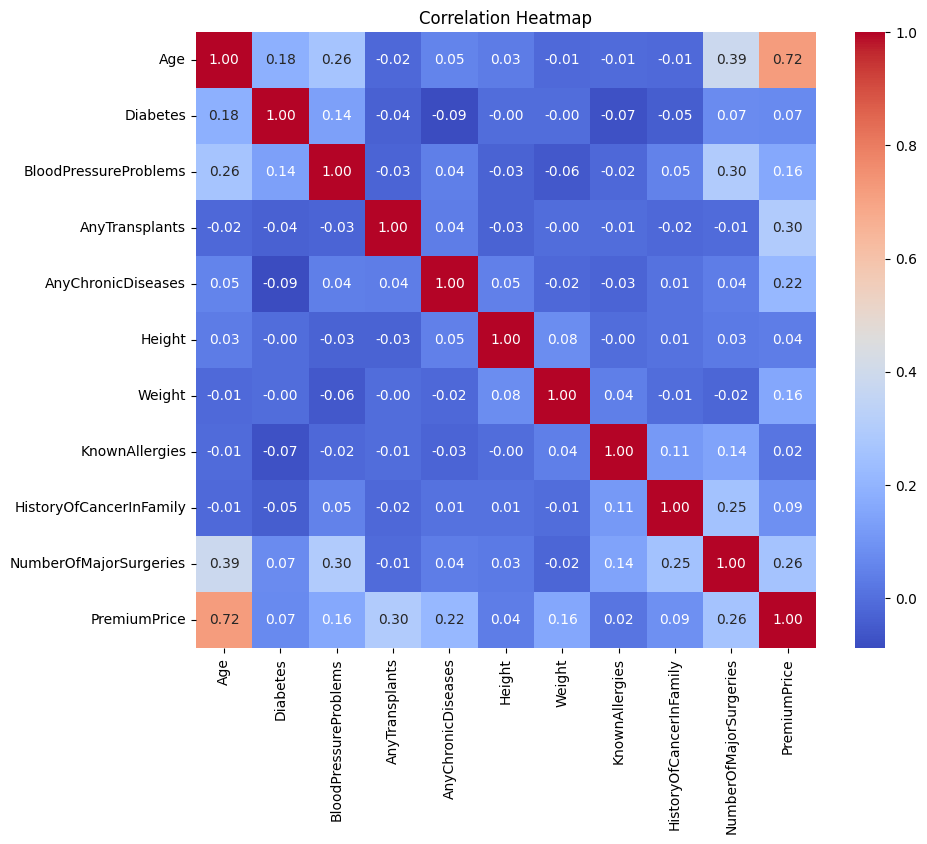

In [328]:
correlation_matrix = df_ML.corr()
# Plot the normalized correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [329]:
# List of numerical features to normalize
numerical_features = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']

In [330]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      949 non-null    int64
 1   Diabetes                 949 non-null    int64
 2   BloodPressureProblems    949 non-null    int64
 3   AnyTransplants           949 non-null    int64
 4   AnyChronicDiseases       949 non-null    int64
 5   Height                   949 non-null    int64
 6   Weight                   949 non-null    int64
 7   KnownAllergies           949 non-null    int64
 8   HistoryOfCancerInFamily  949 non-null    int64
 9   NumberOfMajorSurgeries   949 non-null    int64
 10  PremiumPrice             949 non-null    int64
dtypes: int64(11)
memory usage: 89.0 KB


In [331]:
# Split features and target
X = df_ML.iloc[:, :-1]  # All columns except the target
y = df_ML.iloc[:, -1]   # Target column

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50-50 split for val/test


In [332]:
# Print dataset shapes
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)

Training Set: (664, 10) (664,)
Validation Set: (142, 10) (142,)
Test Set: (143, 10) (143,)


In [333]:
X_train.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
915   54         0                      1               1                   1   
720   51         1                      1               0                   0   
231   36         1                      0               0                   0   
80    44         0                      0               0                   0   
151   47         0                      0               0                   0   

     Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
915     156      73               0                        0   
720     163      73               0                        0   
231     180      74               0                        0   
80      185      64               0                        0   
151     169     116               0                        0   

     NumberOfMajorSurgeries  
915                       2  
720                       0  
231                       0  
80                        0  
151                       1

In [334]:
y_train.head()

915    28000
720    29000
231    23000
80     23000
151    35000
Name: PremiumPrice, dtype: int64

In [335]:
X_val.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
644   20         0                      0               0                   0   
845   41         0                      0               0                   0   
853   37         1                      1               0                   0   
706   29         0                      0               0                   0   
98    52         1                      0               0                   0   

     Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
644     170      57               0                        0   
845     166      58               0                        0   
853     150      69               0                        0   
706     163      60               0                        0   
98      161      63               0                        0   

     NumberOfMajorSurgeries  
644                       0  
845                       0  
853                       0  
706                       0  
98                        0

In [336]:
y_val.head()

644    15000
845    23000
853    23000
706    15000
98     25000
Name: PremiumPrice, dtype: int64

In [337]:
X_test.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
179   66         1                      0               0                   0   
258   57         0                      0               0                   0   
79    30         0                      0               1                   1   
55    41         1                      1               0                   0   
968   18         0                      0               0                   0   

     Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
179     164      78               1                        0   
258     158      96               0                        0   
79      166      87               0                        0   
55      160      63               0                        0   
968     160      73               0                        0   

     NumberOfMajorSurgeries  
179                       2  
258                       0  
79                        0  
55                        0  
968                       0

In [338]:
y_test.head()

179    28000
258    35000
79     38000
55     23000
968    15000
Name: PremiumPrice, dtype: int64

In [339]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [340]:
# Verify scaled data
print("\nSample Scaled Normalized Training Data (0-1 range):")
print(X_train_scaled[:5])


Sample Scaled Normalized Training Data (0-1 range):
[[0.75       0.         1.         1.         1.         0.25581395
  0.33846154 0.         0.         1.        ]
 [0.6875     1.         1.         0.         0.         0.41860465
  0.33846154 0.         0.         0.        ]
 [0.375      1.         0.         0.         0.         0.81395349
  0.35384615 0.         0.         0.        ]
 [0.54166667 0.         0.         0.         0.         0.93023256
  0.2        0.         0.         0.        ]
 [0.60416667 0.         0.         0.         0.         0.55813953
  1.         0.         0.         0.5       ]]


#Linear Regression

In [341]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the validation data
y_val_pred = model.predict(X_val_scaled)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Make predictions on the test data
y_test_pred = model.predict(X_test_scaled)

# evaluate the model on the test data if you have the true values for y_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

X_sm = sm.add_constant(X_train_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

Mean Squared Error: 13544187.343768727
R^2 Score: 0.6272179259721673
Test Mean Squared Error: 11509740.175007463
Test R^2 Score: 0.6984354636185186
                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     149.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          1.58e-161
Time:                        18:05:10   Log-Likelihood:                -6342.1
No. Observations:                 664   AIC:                         1.271e+04
Df Residuals:                     653   BIC:                         1.276e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0

#Decision Tree


In [70]:
X_train, X_test, y_train, y_test

(     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
 915   54         0                      1               1                   1   
 720   51         1                      1               0                   0   
 231   36         1                      0               0                   0   
 80    44         0                      0               0                   0   
 151   47         0                      0               0                   0   
 ..   ...       ...                    ...             ...                 ...   
 108   28         0                      0               0                   1   
 291   29         0                      0               0                   0   
 890   58         1                      0               0                   0   
 460   29         1                      0               0                   0   
 104   23         0                      0               0                   0   
 
      Height  

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

#depths = [3,4,5,67,9,11,13,15]
depths = list(range(3, 15))

# acc_list_train = []
# acc_list_test = []
for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 70.29786614230574 Validation: 67.92401628222524
K-Fold for depth: 3 Accuracy Std: Train: 0.8201531179198606 Validation: 7.257384623374589
***************
K-Fold for depth:4 Accuracy Mean: Train: 78.88214763897525 Validation: 76.95838986883763
K-Fold for depth: 4 Accuracy Std: Train: 0.5897120464313573 Validation: 7.015765518423156
***************
K-Fold for depth:5 Accuracy Mean: Train: 83.98595541811622 Validation: 80.57213930348259
K-Fold for depth: 5 Accuracy Std: Train: 0.5595450338903553 Validation: 4.499344783679442
***************
K-Fold for depth:6 Accuracy Mean: Train: 87.09797594438187 Validation: 79.21302578018997
K-Fold for depth: 6 Accuracy Std: Train: 1.1402626806024714 Validation: 4.929603433658213
***************
K-Fold for depth:7 Accuracy Mean: Train: 92.83779544321385 Validation: 86.29805517865219
K-Fold for depth: 7 Accuracy Std: Train: 0.8988082579666712 Validation: 3.489547192711427
***************
K-Fold for depth:8 Accura

##explanation of how 9 is the best value for the above data.

Sure! Let's dive into why the decision tree with a depth of 9 achieved the best accuracy in your K-Fold cross-validation results.

### Understanding the Metrics
1. **Accuracy Mean**: This is the average accuracy across all folds in the K-Fold cross-validation. It gives an overall measure of how well the model performs.
2. **Accuracy Std (Standard Deviation)**: This measures the variability of the accuracy across the folds. A lower standard deviation indicates more consistent performance.

### Analysis of Depth 9
- **Train Accuracy Mean**: 98.49%
- **Validation Accuracy Mean**: 88.96%
- **Train Accuracy Std**: 0.26
- **Validation Accuracy Std**: 2.93

### Why Depth 9 is Optimal
1. **High Validation Accuracy**: The validation accuracy mean of 88.96% is the highest among all the depths tested. This indicates that the model generalizes well to unseen data.
2. **Balanced Performance**: The train accuracy mean is also very high at 98.49%, suggesting that the model is learning the training data well without overfitting. Overfitting would be indicated by a much higher train accuracy compared to validation accuracy.
3. **Consistency**: The standard deviation for both train and validation accuracy is relatively low (0.26 and 2.93, respectively). This means that the model's performance is consistent across different folds of the data.

### Comparison with Other Depths
- **Shallower Trees (Depth 3-8)**: These depths have lower validation accuracy means, indicating that they might be underfitting the data. They are not complex enough to capture the underlying patterns in the data.
- **Deeper Trees (Depth 10-14)**: While these depths also have high train accuracy means, their validation accuracy means do not improve significantly compared to depth 9. Additionally, the standard deviation for validation accuracy tends to increase, indicating less consistent performance. This suggests that deeper trees might be starting to overfit the training data.

### Conclusion
Depth 9 strikes a good balance between complexity and generalization. It captures the patterns in the training data well without overfitting, and it performs consistently across different folds of the data. This makes it the optimal choice for your decision tree model based on the provided results.

Let me know if you need more details or have any other questions!

# Polynomial Regression

In [72]:
# Initialize PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the training, validation, and test datasets
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Check the shape of transformed features
print("Original number of features:", X_train.shape[1])
print("Number of features after polynomial transformation:", X_train_poly.shape[1])

Original number of features: 10
Number of features after polynomial transformation: 65


In [73]:
# Initialize and train the model
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train)

# Print coefficients and intercept
print("Intercept:", poly_lr_model.intercept_)
print("Number of Coefficients:", len(poly_lr_model.coef_))

Intercept: 13936.94030672943
Number of Coefficients: 65


In [74]:
# Predict on training and validation sets
y_train_pred_poly = poly_lr_model.predict(X_train_poly)
y_val_pred_poly = poly_lr_model.predict(X_val_poly)

# Training set performance
mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)
rmse_train_poly = mean_squared_error(y_train, y_train_pred_poly) ** 0.5
r2_train_poly = r2_score(y_train, y_train_pred_poly)

# Validation set performance
mae_val_poly = mean_absolute_error(y_val, y_val_pred_poly)
rmse_val_poly = mean_squared_error(y_val, y_val_pred_poly) ** 0.5
r2_val_poly = r2_score(y_val, y_val_pred_poly)

In [75]:
# Display results
print("\nTraining Dataset Performance with Polynomial Regression:")
print(f"Mean Absolute Error (MAE): {mae_train_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_poly:.2f}")
print(f"R-squared (R²): {r2_train_poly:.2f}")


Training Dataset Performance with Polynomial Regression:
Mean Absolute Error (MAE): 2037.31
Root Mean Squared Error (RMSE): 2731.32
R-squared (R²): 0.80


In [76]:
print("\nValidation Dataset Performance with Polynomial Regression:")
print(f"Mean Absolute Error (MAE): {mae_val_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val_poly:.2f}")
print(f"R-squared (R²): {r2_val_poly:.2f}")


Validation Dataset Performance with Polynomial Regression:
Mean Absolute Error (MAE): 2397.73
Root Mean Squared Error (RMSE): 3372.29
R-squared (R²): 0.69


In [77]:
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_model.fit(X_train_poly, y_train)
y_train_pred_ridge = ridge_model.predict(X_train_poly)
y_val_pred_ridge = ridge_model.predict(X_val_poly)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)
# Display R² scores
print("\nR² Scores for Ridge Regression:")
print(f"Training Dataset R²: {r2_train_ridge:.2f}")
print(f"Validation Dataset R²: {r2_val_ridge:.2f}")


R² Scores for Ridge Regression:
Training Dataset R²: 0.79
Validation Dataset R²: 0.68


Hyperparameter tuning

In [78]:
# Hyperparameter tuning

param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)
ridge_cv.fit(X_train_poly, y_train)

print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Best R² from CV:", ridge_cv.best_score_)

Best alpha: 0.1
Best R² from CV: 0.7408079549781196


In [79]:
# Use the best model from GridSearchCV
ridge_best = ridge_cv.best_estimator_

# Predict on the test set
y_test_pred = ridge_best.predict(X_test_poly)

# Evaluate on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5
r2_test = r2_score(y_test, y_test_pred)

In [80]:
print("\nTest Dataset Performance:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


Test Dataset Performance:
Mean Absolute Error (MAE): 2325.23
Root Mean Squared Error (RMSE): 3298.02
R-squared (R²): 0.72


# Random forest regressor

In [81]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,   # Number of trees in the forest
    max_depth=None,     # Allow trees to grow fully
    random_state=42,    # For reproducibility
    min_samples_split=2,  # Minimum samples to split a node
    min_samples_leaf=1    # Minimum samples per leaf
)

# Train the model
rf_model.fit(X_train_poly, y_train)

# Predict on training and validation sets
y_train_pred_rf = rf_model.predict(X_train_poly)
y_val_pred_rf = rf_model.predict(X_val_poly)

# Evaluate training performance
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train_rf = mean_squared_error(y_train, y_train_pred_rf) ** 0.5
r2_train_rf = r2_score(y_train, y_train_pred_rf)

# Evaluate validation performance
mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)
rmse_val_rf = mean_squared_error(y_val, y_val_pred_rf) ** 0.5
r2_val_rf = r2_score(y_val, y_val_pred_rf)

In [82]:
# Display results
print("\nTraining Dataset Performance (Random Forest):")
print(f"Mean Absolute Error (MAE): {mae_train_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rf:.2f}")
print(f"R-squared (R²): {r2_train_rf:.2f}")

print("\nValidation Dataset Performance (Random Forest):")
print(f"Mean Absolute Error (MAE): {mae_val_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val_rf:.2f}")
print(f"R-squared (R²): {r2_val_rf:.2f}")


Training Dataset Performance (Random Forest):
Mean Absolute Error (MAE): 314.98
Root Mean Squared Error (RMSE): 780.36
R-squared (R²): 0.98

Validation Dataset Performance (Random Forest):
Mean Absolute Error (MAE): 1005.63
Root Mean Squared Error (RMSE): 2466.01
R-squared (R²): 0.83


Hyperparameter tuning

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf_cv = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit GridSearchCV
rf_cv.fit(X_train_poly, y_train)

# Get best parameters and model
print("Best parameters:", rf_cv.best_params_)
rf_best = rf_cv.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [113]:
# Evaluate the best model on validation set
y_val_pred_rf_best = rf_best.predict(X_val_poly)
r2_val_rf_best = r2_score(y_val, y_val_pred_rf_best)
print("Validation R² with best Random Forest model:", r2_val_rf_best)



Validation R² with best Random Forest model: 0.8356211532135822


In [114]:
# Predict on the test set
y_test_pred_rf = rf_best.predict(X_test_poly)

# Evaluate test performance
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = mean_squared_error(y_test, y_test_pred_rf) ** 0.5
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("\nTest Dataset Performance (Random Forest):")
print(f"Mean Absolute Error (MAE): {mae_test_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_rf:.2f}")
print(f"R-squared (R²): {r2_test_rf:.2f}")


Test Dataset Performance (Random Forest):
Mean Absolute Error (MAE): 1187.28
Root Mean Squared Error (RMSE): 3183.66
R-squared (R²): 0.73


In [115]:
# Predict on the training set
y_train_pred_rf = rf_best.predict(X_train_poly)

# Calculate R² score
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print(f"R² Score on Training Dataset (Random Forest): {r2_train_rf:.2f}")

R² Score on Training Dataset (Random Forest): 0.95


# GBDT regressor

In [ ]:
# Initialize the GBDT Regressor
gbdt_model = GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of individual trees
    random_state=42
)

# Train the GBDT model on the training data
gbdt_model.fit(X_train_poly, y_train)

# Predict on training and validation datasets
y_train_pred_gbdt = gbdt_model.predict(X_train_poly)
y_val_pred_gbdt = gbdt_model.predict(X_val_poly)

# Evaluate Training Performance
mae_train_gbdt = mean_absolute_error(y_train, y_train_pred_gbdt)
rmse_train_gbdt = mean_squared_error(y_train, y_train_pred_gbdt) ** 0.5
r2_train_gbdt = r2_score(y_train, y_train_pred_gbdt)

# Evaluate Validation Performance
mae_val_gbdt = mean_absolute_error(y_val, y_val_pred_gbdt)
rmse_val_gbdt = mean_squared_error(y_val, y_val_pred_gbdt)
r2_val_gbdt = r2_score(y_val, y_val_pred_gbdt)

# Display results
print("\nTraining Dataset Performance (GBDT):")
print(f"Mean Absolute Error (MAE): {mae_train_gbdt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_gbdt:.2f}")
print(f"R-squared (R²): {r2_train_gbdt:.2f}")

print("\nValidation Dataset Performance (GBDT):")
print(f"Mean Absolute Error (MAE): {mae_val_gbdt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val_gbdt:.2f}")
print(f"R-squared (R²): {r2_val_gbdt:.2f}")



Training Dataset Performance (GBDT):
Mean Absolute Error (MAE): 785.18
Root Mean Squared Error (RMSE): 1247.10
R-squared (R²): 0.96

Validation Dataset Performance (GBDT):
Mean Absolute Error (MAE): 1511.09
Root Mean Squared Error (RMSE): 6916402.58
R-squared (R²): 0.81


## GBDT regressor

In [ ]:
# Initialize the GBDT Regressor
gbdt_model = GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of individual trees
    random_state=42
)

# Train the GBDT model on the training data
gbdt_model.fit(X_train_poly, y_train)

# Predict on training and validation datasets
y_train_pred_gbdt = gbdt_model.predict(X_train_poly)
y_val_pred_gbdt = gbdt_model.predict(X_val_poly)

# Evaluate Training Performance
mae_train_gbdt = mean_absolute_error(y_train, y_train_pred_gbdt)
rmse_train_gbdt = mean_squared_error(y_train, y_train_pred_gbdt) ** 0.5
r2_train_gbdt = r2_score(y_train, y_train_pred_gbdt)

# Evaluate Validation Performance
mae_val_gbdt = mean_absolute_error(y_val, y_val_pred_gbdt)
rmse_val_gbdt = mean_squared_error(y_val, y_val_pred_gbdt) ** 0.5
r2_val_gbdt = r2_score(y_val, y_val_pred_gbdt)

# Display results
print("\nTraining Dataset Performance (GBDT):")
print(f"Mean Absolute Error (MAE): {mae_train_gbdt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_gbdt:.2f}")
print(f"R-squared (R²): {r2_train_gbdt:.2f}")

print("\nValidation Dataset Performance (GBDT):")
print(f"Mean Absolute Error (MAE): {mae_val_gbdt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val_gbdt:.2f}")
print(f"R-squared (R²): {r2_val_gbdt:.2f}")



Training Dataset Performance (GBDT):
Mean Absolute Error (MAE): 785.18
Root Mean Squared Error (RMSE): 1247.10
R-squared (R²): 0.96

Validation Dataset Performance (GBDT):
Mean Absolute Error (MAE): 1511.09
Root Mean Squared Error (RMSE): 2629.91
R-squared (R²): 0.81


In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
gbdt_cv = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
gbdt_cv.fit(X_train_poly, y_train)

# Get best parameters and model
print("Best parameters:", gbdt_cv.best_params_)
gbdt_best = gbdt_cv.best_estimator_

# Evaluate the best model on validation set
y_val_pred_gbdt_best = gbdt_best.predict(X_val_poly)
r2_val_gbdt_best = r2_score(y_val, y_val_pred_gbdt_best)
print("Validation R² with best GBDT model:", r2_val_gbdt_best)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Validation R² with best GBDT model: 0.8203233714506059


In [ ]:
# Predict on the test set
y_test_pred_gbdt = gbdt_best.predict(X_test_poly)

# Evaluate test performance
mae_test_gbdt = mean_absolute_error(y_test, y_test_pred_gbdt)
rmse_test_gbdt = mean_squared_error(y_test, y_test_pred_gbdt) ** 0.5
r2_test_gbdt = r2_score(y_test, y_test_pred_gbdt)

print("\nTest Dataset Performance (GBDT):")
print(f"Mean Absolute Error (MAE): {mae_test_gbdt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_gbdt:.2f}")
print(f"R-squared (R²): {r2_test_gbdt:.2f}")



Test Dataset Performance (GBDT):
Mean Absolute Error (MAE): 1307.53
Root Mean Squared Error (RMSE): 3256.36
R-squared (R²): 0.72


In [ ]:
# Get feature importances
feature_importances = rf_best.feature_importances_
feature_names = poly.get_feature_names_out(X_train.columns)  # For polynomial features

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\nTop 10 Important Features:")
print(importance_df.head(10))



Top 10 Important Features:
                        Feature  Importance
10                        Age^2    0.359593
0                           Age    0.298269
40        AnyTransplants Weight    0.076053
16                   Age Weight    0.061988
39        AnyTransplants Height    0.036300
14       Age AnyChronicDiseases    0.031244
18  Age HistoryOfCancerInFamily    0.019098
19   Age NumberOfMajorSurgeries    0.016190
55                     Weight^2    0.015318
6                        Weight    0.013677


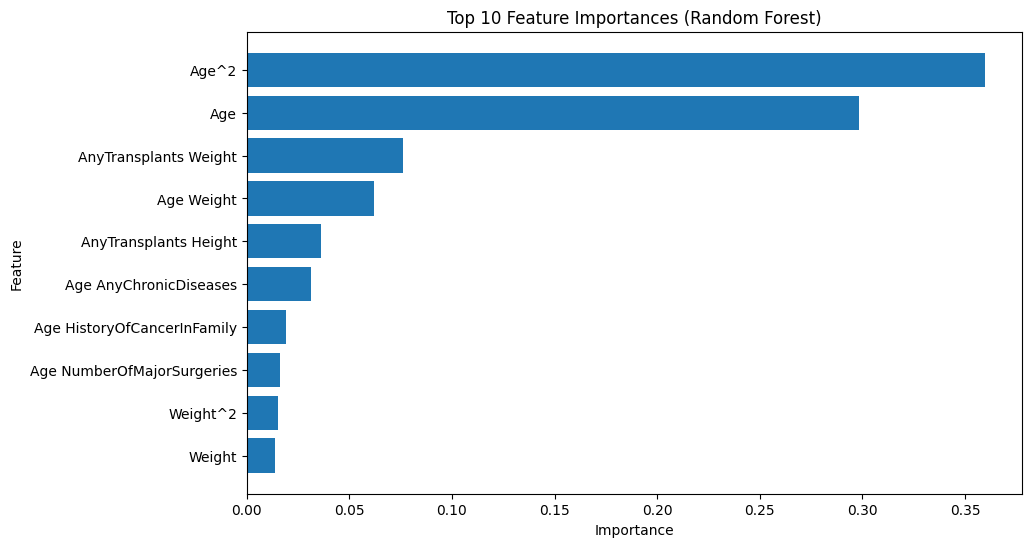

In [ ]:
# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])  # Reverse for descending order
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

In [ ]:
# Save feature importances to a CSV file
importance_df.to_csv('feature_importances_rf.csv', index=False)
print("Feature importances saved to 'feature_importances_rf.csv'.")

Feature importances saved to 'feature_importances_rf.csv'.


In [ ]:
# Save the model and transformer in a single file
with open('random_forest_with_poly1.pkl', 'wb') as file:
    pickle.dump({'model': rf_best, 'poly_transformer': poly}, file)

print("Model and transformer saved as 'random_forest_with_poly1.pkl'.")

Model and transformer saved as 'random_forest_with_poly1.pkl'.


# Residual analysis

In [87]:
# Predict on the test set using rf_best
y_test_pred_rf = rf_best.predict(X_test_poly)

# Calculate residuals
residuals_rf = y_test - y_test_pred_rf

# Combine actuals, predictions, and residuals into a DataFrame for analysis
import pandas as pd
residuals_df_rf = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_rf,
    'Residual': residuals_rf
})

In [88]:
print("\nSummary Statistics of Residuals (Random Forest):")
print(residuals_rf.describe())


Summary Statistics of Residuals (Random Forest):
count      143.000000
mean       -86.409308
std       3193.678112
min     -20980.206448
25%       -525.894300
50%        -41.529455
75%        119.390918
max      18146.924964
Name: PremiumPrice, dtype: float64


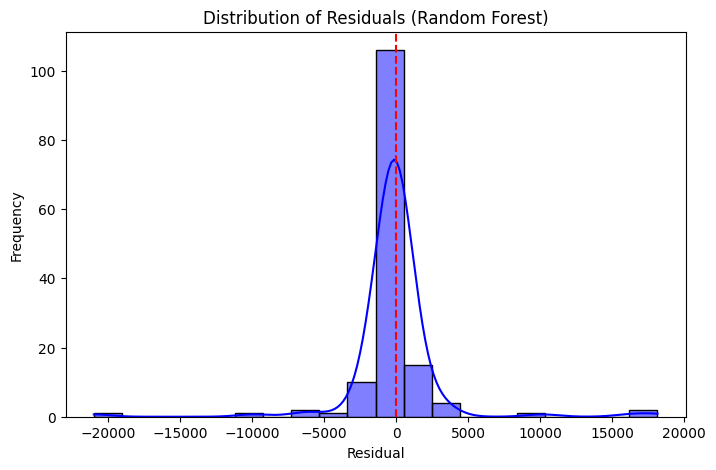

In [89]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, kde=True, bins=20, color="blue")
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

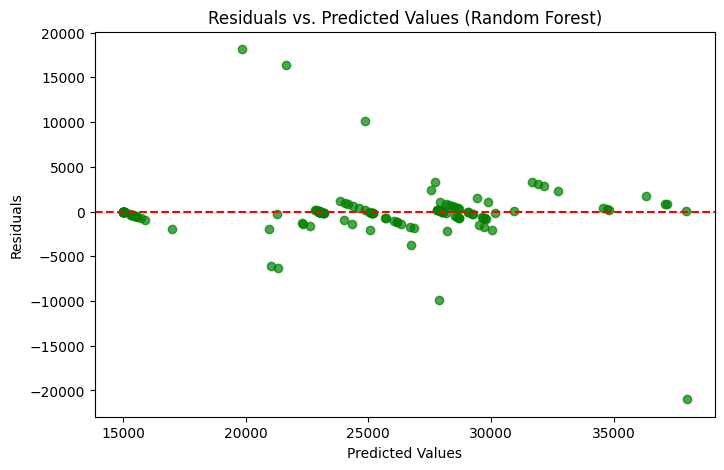

In [90]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred_rf, residuals_rf, alpha=0.7, color="green")
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

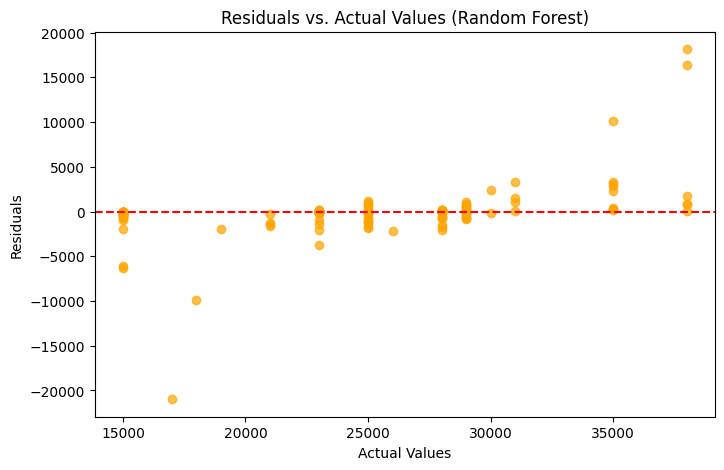

In [91]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals_rf, alpha=0.7, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Actual Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [92]:
# Identify the top residuals
top_residuals_rf = residuals_df_rf.sort_values(by='Residual', key=abs, ascending=False).head(30)

print("\nTop 10 Largest Residuals (Random Forest):")
print(top_residuals_rf)


Top 10 Largest Residuals (Random Forest):
     Actual     Predicted      Residual
978   17000  37980.206448 -20980.206448
740   38000  19853.075036  18146.924964
73    38000  21627.572942  16372.427058
286   35000  24856.488095  10143.511905
333   18000  27888.763215  -9888.763215
593   15000  21315.247478  -6315.247478
325   15000  21034.757385  -6034.757385
583   23000  26727.942596  -3727.942596
568   35000  31668.964941   3331.035059
622   31000  27715.697088   3284.302912
682   35000  31941.252420   3058.747580
789   35000  32175.403680   2824.596320
405   30000  27560.739159   2439.260841
160   35000  32729.683534   2270.316466
219   26000  28208.651789  -2208.651789
625   23000  25060.689542  -2060.689542
453   28000  30052.455190  -2052.455190
761   15000  16998.641666  -1998.641666
386   19000  20945.071637  -1945.071637
758   25000  26860.391108  -1860.391108
179   28000  29716.477958  -1716.477958
931   25000  26715.908007  -1715.908007
369   38000  36316.059012   1683.9409

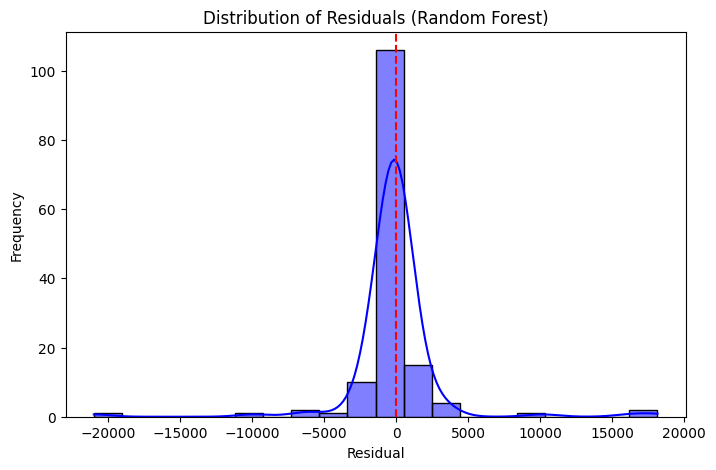

In [93]:
# Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, kde=True, bins=20, color="blue")
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

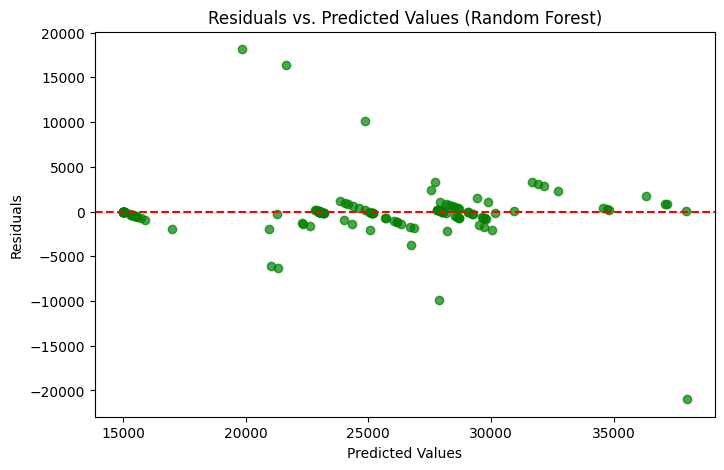

In [94]:
# Residuals vs. Predicted Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred_rf, residuals_rf, alpha=0.7, color="green")
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


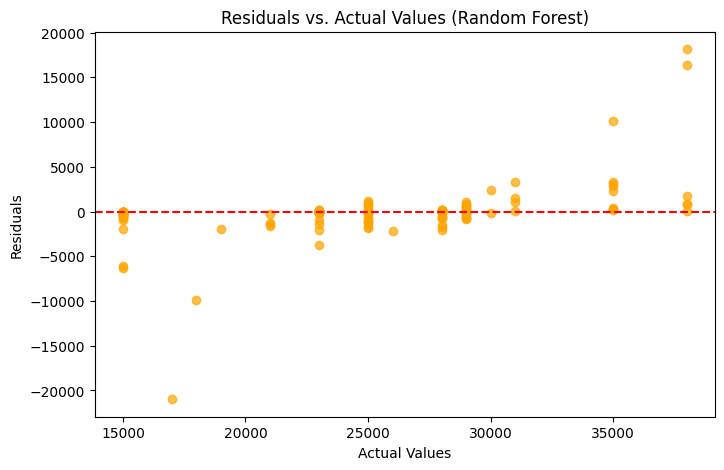

In [95]:
# Residuals vs. Actual Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals_rf, alpha=0.7, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Actual Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

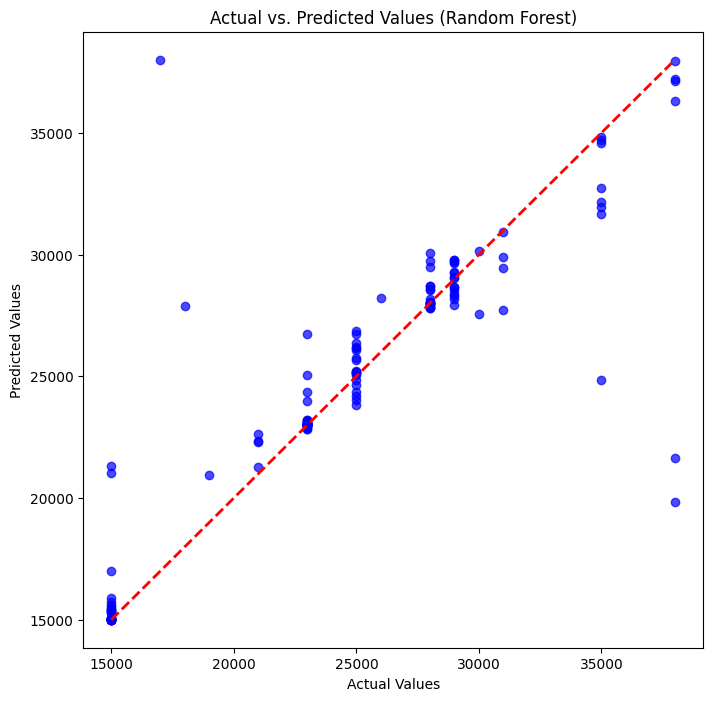

In [96]:
# Actual vs. Predicted Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred_rf, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

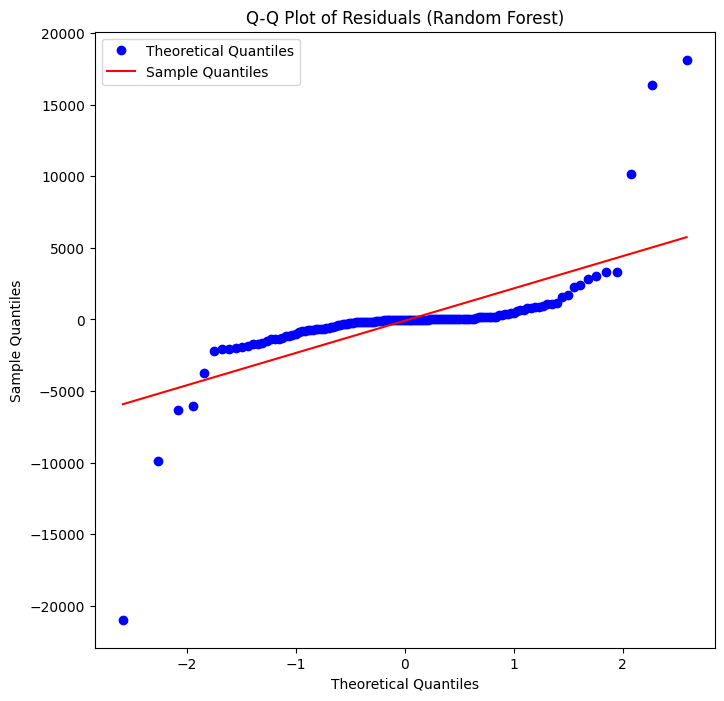

In [97]:
import scipy.stats as stats

# Q-Q plot for residuals
plt.figure(figsize=(8, 8))
res = stats.probplot(residuals_rf, dist="norm", plot=plt)

# Add a legend
plt.legend(["Theoretical Quantiles", "Sample Quantiles"], loc="best")
plt.title('Q-Q Plot of Residuals (Random Forest)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [98]:
# pip install shap

In [99]:
import shap

In [100]:
# Initialize the SHAP explainer for tree-based models
explainer = shap.TreeExplainer(rf_best)


In [101]:
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_poly)


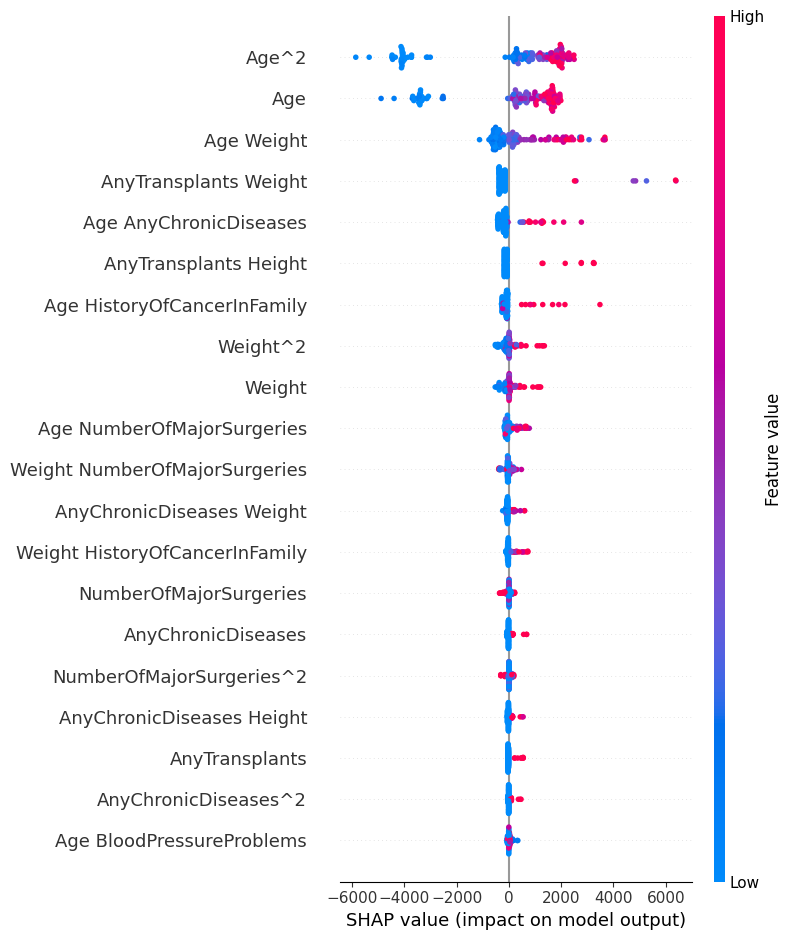

In [102]:
# Visualize global feature importance (summary plot)
shap.summary_plot(shap_values, X_test_poly, feature_names=poly.get_feature_names_out(X_train.columns))

In [103]:
shap.initjs()


In [104]:
# Select a specific test instance
instance = X_test_poly[0].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[0],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [105]:
# Select a specific test instance
instance = X_test_poly[1].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[1],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [106]:
# Select a specific test instance
instance = X_test_poly[2].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[2],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [107]:
# Select a specific test instance
instance = X_test_poly[10].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[10],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [108]:
# Select a specific test instance
instance = X_test_poly[100].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[100],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [109]:
# Select a specific test instance
instance = X_test_poly[20].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[20],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [110]:
# Select a specific test instance
instance = X_test_poly[30].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[30],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [111]:
# Select a specific test instance
instance = X_test_poly[40].reshape(1, -1)

# Visualize feature contributions for this instance
shap.force_plot(
    explainer.expected_value,
    shap_values[40],  # SHAP values for the instance
    poly.get_feature_names_out(X_train.columns)
)

In [112]:
# Initialize SHAP JavaScript
shap.initjs()

# Loop through all instances in the test dataset
for i in range(len(X_test_poly)):
    # Select a specific instance
    instance = X_test_poly[i].reshape(1, -1)

    # Generate SHAP values for this instance
    shap_values_instance = explainer.shap_values(instance)

    # Visualize feature contributions for this instance
    shap.force_plot(
        explainer.expected_value,
        shap_values_instance[0],  # SHAP values for the instance
        poly.get_feature_names_out(X_train.columns)
    )


# Advanced Hyperparameter Tuning for Ridge Regression

In [116]:
# Define a wider parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000],  # Regularization strengths
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solvers supported by Ridge
}

In [117]:
# Initialize Ridge Regression model
ridge_model = Ridge()

# Set up GridSearchCV
ridge_cv = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    scoring='r2',   # Use R² as the evaluation metric
    cv=5,           # 5-fold cross-validation
    verbose=1,      # Display progress
    n_jobs=-1       # Use all available cores
)

# Fit GridSearchCV on the training data
ridge_cv.fit(X_train_poly, y_train)

# Get the best hyperparameters and the corresponding R² score
best_params = ridge_cv.best_params_
best_r2 = ridge_cv.best_score_

print(f"Best parameters: {best_params}")
print(f"Best R² from cross-validation: {best_r2:.4f}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters: {'alpha': 0.1, 'solver': 'saga'}
Best R² from cross-validation: 0.7410


In [118]:
# Get the best model
ridge_best = ridge_cv.best_estimator_

# Predict on the validation set
y_val_pred_ridge = ridge_best.predict(X_val_poly)

# Evaluate performance
mae_val = mean_absolute_error(y_val, y_val_pred_ridge)
rmse_val = mean_squared_error(y_val, y_val_pred_ridge) ** 0.5
r2_val = r2_score(y_val, y_val_pred_ridge)

print("\nValidation Dataset Performance (Best Ridge Model):")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared (R²): {r2_val:.4f}")


Validation Dataset Performance (Best Ridge Model):
Mean Absolute Error (MAE): 2393.68
Root Mean Squared Error (RMSE): 3364.12
R-squared (R²): 0.6885


In [119]:
# Predict on the test set
y_test_pred_ridge = ridge_best.predict(X_test_poly)

# Evaluate test performance
mae_test = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_test = mean_squared_error(y_test, y_test_pred_ridge) ** 0.5
r2_test = r2_score(y_test, y_test_pred_ridge)

print("\nTest Dataset Performance (Best Ridge Model):")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.4f}")


Test Dataset Performance (Best Ridge Model):
Mean Absolute Error (MAE): 2324.91
Root Mean Squared Error (RMSE): 3296.33
R-squared (R²): 0.7153


In [120]:
# Predict on the training set
y_train_pred_ridge = ridge_best.predict(X_train_poly)

# Calculate metrics
r2_train = r2_score(y_train, y_train_pred_ridge)
mae_train = mean_absolute_error(y_train, y_train_pred_ridge)
rmse_train = mean_squared_error(y_train, y_train_pred_ridge) ** 0.5

# Display results
print("\nTraining Dataset Performance (Best Ridge Model):")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")


Training Dataset Performance (Best Ridge Model):
R-squared (R²): 0.8039
Mean Absolute Error (MAE): 2038.67
Root Mean Squared Error (RMSE): 2733.79


In [121]:
# Create a DataFrame with X_train, Y_train (actual), Random Forest predictions, and Ridge predictions
train_output_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X_train.columns))
train_output_df['Actual_PremiumPrice'] = y_train.values
train_output_df['Predicted_RF_PremiumPrice'] = y_train_pred_rf
train_output_df['Predicted_Ridge_PremiumPrice'] = y_train_pred_ridge

# Save the DataFrame to an Excel file
output_path = "training_data_with_predictions_rf_ridge.xlsx"
train_output_df.to_excel(output_path, index=False)

print(f"Excel file saved at: {output_path}")

Excel file saved at: training_data_with_predictions_rf_ridge.xlsx


In [122]:
# Validation dataset
val_output_df = pd.DataFrame(X_val_poly, columns=poly.get_feature_names_out(X_train.columns))
val_output_df['Actual_PremiumPrice'] = y_val.values
val_output_df['Predicted_RF_PremiumPrice'] = y_val_pred_rf
val_output_df['Predicted_Ridge_PremiumPrice'] = y_val_pred_ridge

# Save validation dataset to Excel
val_output_path = "validation_data_with_predictions_rf_ridge.xlsx"
val_output_df.to_excel(val_output_path, index=False)
print(f"Validation dataset saved at: {val_output_path}")

# Test dataset
test_output_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_train.columns))
test_output_df['Actual_PremiumPrice'] = y_test.values
test_output_df['Predicted_RF_PremiumPrice'] = y_test_pred_rf
test_output_df['Predicted_Ridge_PremiumPrice'] = y_test_pred_ridge

# Save test dataset to Excel
test_output_path = "test_data_with_predictions_rf_ridge.xlsx"
test_output_df.to_excel(test_output_path, index=False)
print(f"Test dataset saved at: {test_output_path}")

Validation dataset saved at: validation_data_with_predictions_rf_ridge.xlsx
Test dataset saved at: test_data_with_predictions_rf_ridge.xlsx


# Re-building Random Forest models using unscaled datasets

In [123]:
df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries        BMI BMI_Binned  PremiumPrice  
0                       0  23.725286     Normal         25000  
1                       0  22.530864     Normal         29000  
2                       1  23.634033     Normal         23000  
3                       2  27.770313   o_weight         28000  
4                       1  31.934969     obese1         23000

In [124]:
df=df.drop(columns=['BMI_Binned'])

In [125]:
df=df.drop(columns=['BMI'])

In [126]:
df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1         23000  
3                       2         28000  
4                       1         23000

In [127]:
# Define features (X) and target (y)
X = df.drop(columns=['PremiumPrice'])  # Features
y = df['PremiumPrice']  # Target variable

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (664, 10), Validation set: (142, 10), Test set: (143, 10)


In [128]:
# Initialize Random Forest
rf_model_unscaled = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Let trees grow fully
    random_state=42,       # For reproducibility
    min_samples_split=2,   # Minimum samples to split a node
    min_samples_leaf=1     # Minimum samples per leaf
)

# Train the model on unscaled training data
rf_model_unscaled.fit(X_train, y_train)

# Predict on training, validation, and test datasets
y_train_pred_rf = rf_model_unscaled.predict(X_train)
y_val_pred_rf = rf_model_unscaled.predict(X_val)
y_test_pred_rf = rf_model_unscaled.predict(X_test)

In [129]:
# Evaluate on training set
r2_train = r2_score(y_train, y_train_pred_rf)
mae_train = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train = mean_squared_error(y_train, y_train_pred_rf) ** 0.5

# Evaluate on validation set
r2_val = r2_score(y_val, y_val_pred_rf)
mae_val = mean_absolute_error(y_val, y_val_pred_rf)
rmse_val = mean_squared_error(y_val, y_val_pred_rf) ** 0.5

# Evaluate on test set
r2_test = r2_score(y_test, y_test_pred_rf)
mae_test = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test = mean_squared_error(y_test, y_test_pred_rf) ** 0.5

# Print results
print("\nTraining Performance (Unscaled):")
print(f"R-squared (R²): {r2_train:.2f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")

print("\nValidation Performance (Unscaled):")
print(f"R-squared (R²): {r2_val:.2f}, MAE: {mae_val:.2f}, RMSE: {rmse_val:.2f}")

print("\nTest Performance (Unscaled):")
print(f"R-squared (R²): {r2_test:.2f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")



Training Performance (Unscaled):
R-squared (R²): 0.99, MAE: 261.10, RMSE: 733.46

Validation Performance (Unscaled):
R-squared (R²): 0.84, MAE: 938.10, RMSE: 2443.08

Test Performance (Unscaled):
R-squared (R²): 0.74, MAE: 960.35, RMSE: 3170.96


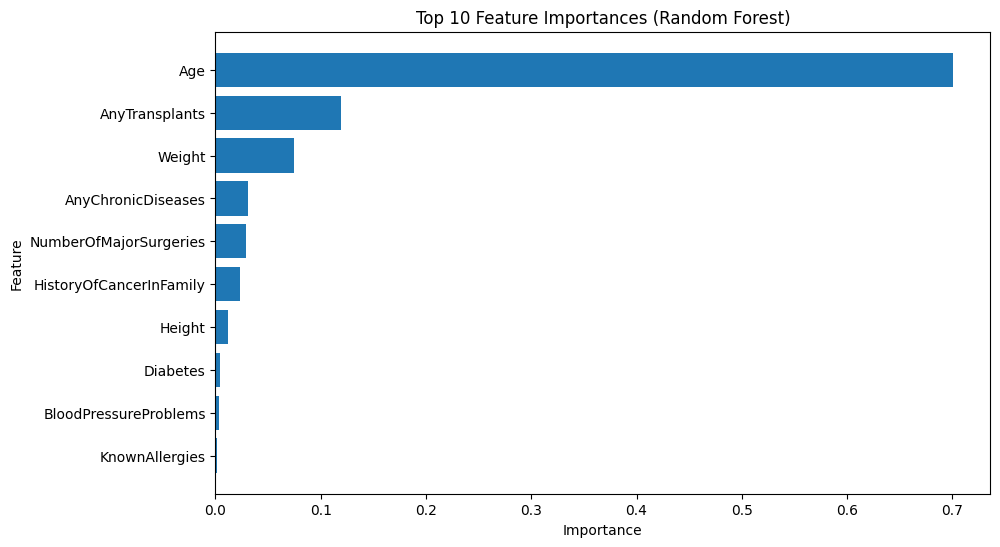

In [130]:
# Get feature importances
feature_importances = rf_model_unscaled.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

# Including polynomial features

In [212]:
# Initialize PolynomialFeatures (degree 2, no bias term)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Generate polynomial features for training, validation, and test sets
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Get feature names for polynomial features
poly_feature_names = poly.get_feature_names_out(X_train.columns)
print(f"Number of features after polynomial transformation: {len(poly_feature_names)}")

Number of features after polynomial transformation: 65


In [213]:
# Initialize Random Forest Regressor
rf_model_poly = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Let trees grow fully
    random_state=42,       # For reproducibility
    min_samples_split=2,   # Minimum samples to split a node
    min_samples_leaf=1     # Minimum samples per leaf
)

# Train the model on polynomial features
rf_model_poly.fit(X_train_poly, y_train)

# Predict on training, validation, and test sets
y_train_pred_rf_poly = rf_model_poly.predict(X_train_poly)
y_val_pred_rf_poly = rf_model_poly.predict(X_val_poly)
y_test_pred_rf_poly = rf_model_poly.predict(X_test_poly)


In [214]:
# Evaluate on training set
r2_train = r2_score(y_train, y_train_pred_rf_poly)
mae_train = mean_absolute_error(y_train, y_train_pred_rf_poly)
rmse_train = mean_squared_error(y_train, y_train_pred_rf_poly) ** 0.5

# Evaluate on validation set
r2_val = r2_score(y_val, y_val_pred_rf_poly)
mae_val = mean_absolute_error(y_val, y_val_pred_rf_poly)
rmse_val = mean_squared_error(y_val, y_val_pred_rf_poly) ** 0.5

# Evaluate on test set
r2_test = r2_score(y_test, y_test_pred_rf_poly)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_poly)
rmse_test = mean_squared_error(y_test, y_test_pred_rf_poly) ** 0.5

# Print results
print("\nTraining Performance (Polynomial Features):")
print(f"R-squared (R²): {r2_train:.2f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")

print("\nValidation Performance (Polynomial Features):")
print(f"R-squared (R²): {r2_val:.2f}, MAE: {mae_val:.2f}, RMSE: {rmse_val:.2f}")

print("\nTest Performance (Polynomial Features):")
print(f"R-squared (R²): {r2_test:.2f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")



Training Performance (Polynomial Features):
R-squared (R²): 0.98, MAE: 329.50, RMSE: 794.10

Validation Performance (Polynomial Features):
R-squared (R²): 0.83, MAE: 1036.27, RMSE: 2451.18

Test Performance (Polynomial Features):
R-squared (R²): 0.70, MAE: 1283.85, RMSE: 3372.17


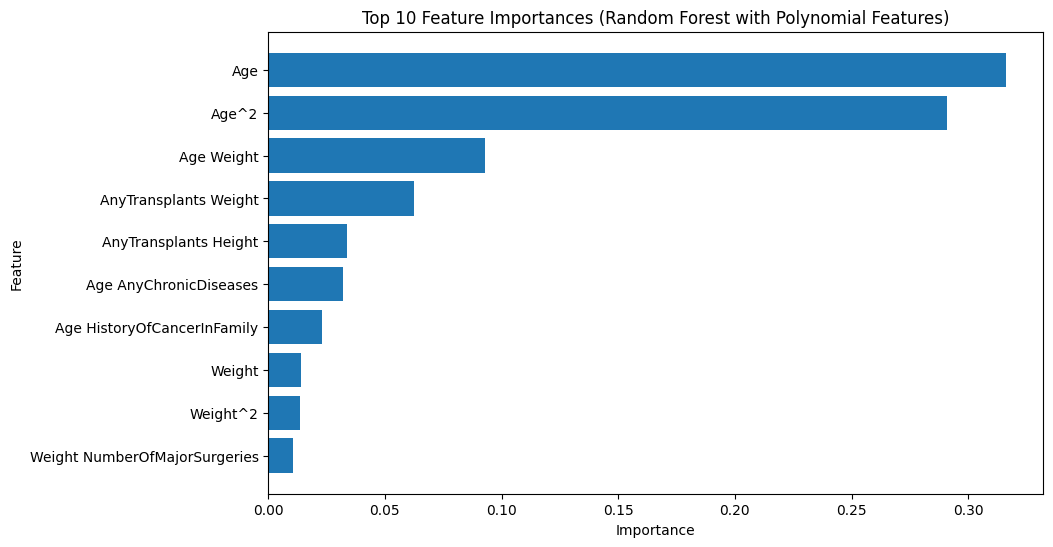

In [215]:
# Get feature importances
feature_importances = rf_model_poly.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest with Polynomial Features)')
plt.show()


In [216]:
# Save the model and transformer
with open('random_forest_poly_model.pkl', 'wb') as file:
    pickle.dump({'model': rf_model_poly, 'poly_transformer': poly}, file)

print("Model and transformer saved as 'random_forest_poly_model.pkl'.")

Model and transformer saved as 'random_forest_poly_model.pkl'.


# Hyper parameter tuning on Random Forest model

In [217]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required at a leaf node
}

In [218]:
# Initialize Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
rf_cv = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',       # Use R² as the evaluation metric
    cv=5,               # 5-fold cross-validation
    verbose=1,          # Display progress
    n_jobs=-1           # Use all available processors
)

# Fit GridSearchCV on the training data (polynomial features)
rf_cv.fit(X_train_poly, y_train)

# Get the best parameters and corresponding R² score
best_params = rf_cv.best_params_
best_r2 = rf_cv.best_score_

print(f"Best parameters: {best_params}")
print(f"Best R² from cross-validation: {best_r2:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best R² from cross-validation: 0.8892


In [219]:

# Use the best model from GridSearchCV
rf_best_poly = rf_cv.best_estimator_

# Predict on validation set
y_val_pred_rf_best = rf_best_poly.predict(X_val_poly)
r2_val = r2_score(y_val, y_val_pred_rf_best)
mae_val = mean_absolute_error(y_val, y_val_pred_rf_best)
rmse_val = mean_squared_error(y_val, y_val_pred_rf_best) ** 0.5

print("\nValidation Performance (Best Random Forest Model):")
print(f"R-squared (R²): {r2_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")

# Predict on test set
y_test_pred_rf_best = rf_best_poly.predict(X_test_poly)
r2_test = r2_score(y_test, y_test_pred_rf_best)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_best)
rmse_test = mean_squared_error(y_test, y_test_pred_rf_best) ** 0.5

print("\nTest Performance (Best Random Forest Model):")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")



Validation Performance (Best Random Forest Model):
R-squared (R²): 0.8293
Mean Absolute Error (MAE): 1039.30
Root Mean Squared Error (RMSE): 2490.60

Test Performance (Best Random Forest Model):
R-squared (R²): 0.7293
Mean Absolute Error (MAE): 1198.22
Root Mean Squared Error (RMSE): 3214.21


In [220]:
# Calculate metrics for the training dataset using the tuned Random Forest model
r2_train_rf_best = r2_score(y_train, y_train_pred_rf_poly)
mae_train_rf_best = mean_absolute_error(y_train, y_train_pred_rf_poly)
rmse_train_rf_best = mean_squared_error(y_train, y_train_pred_rf_poly) ** 0.5

# Print training dataset performance
print("\nTrain Performance (Best Random Forest Model):")
print(f"R-squared (R²): {r2_train_rf_best:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_rf_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rf_best:.2f}")


Train Performance (Best Random Forest Model):
R-squared (R²): 0.9835
Mean Absolute Error (MAE): 329.50
Root Mean Squared Error (RMSE): 794.10


In [221]:
# Save the best Random Forest model and PolynomialFeatures transformer for deployment
with open('rf_best_poly_model_for_streamlit.pkl', 'wb') as file:
    pickle.dump({'model': rf_best_poly, 'poly_transformer': poly}, file)

print("\nBest model saved for deployment as 'rf_best_poly_model_for_streamlit.pkl'.")



Best model saved for deployment as 'rf_best_poly_model_for_streamlit.pkl'.


In [222]:
# Extract feature importance values from the model
feature_importances = rf_best_poly.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': poly.get_feature_names_out(X_train.columns),  # Feature names from PolynomialFeatures
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top n features
n = 20  # Set the number of top features to display
top_features_df = importance_df.head(n)

print(f"Top {n} Features by Importance:")
print(top_features_df)

Top 20 Features by Importance:
                          Feature  Importance
0                             Age    0.323304
10                          Age^2    0.298000
16                     Age Weight    0.095385
40          AnyTransplants Weight    0.069817
39          AnyTransplants Height    0.035049
14         Age AnyChronicDiseases    0.033325
18    Age HistoryOfCancerInFamily    0.020447
55                       Weight^2    0.013918
19     Age NumberOfMajorSurgeries    0.011705
58  Weight NumberOfMajorSurgeries    0.011432
6                          Weight    0.010948
15                     Age Height    0.006704
54  Height NumberOfMajorSurgeries    0.006052
3                  AnyTransplants    0.005851
13             Age AnyTransplants    0.005557
51                  Height Weight    0.005481
37               AnyTransplants^2    0.004958
46      AnyChronicDiseases Weight    0.003992
4              AnyChronicDiseases    0.003537
45      AnyChronicDiseases Height    0.003493


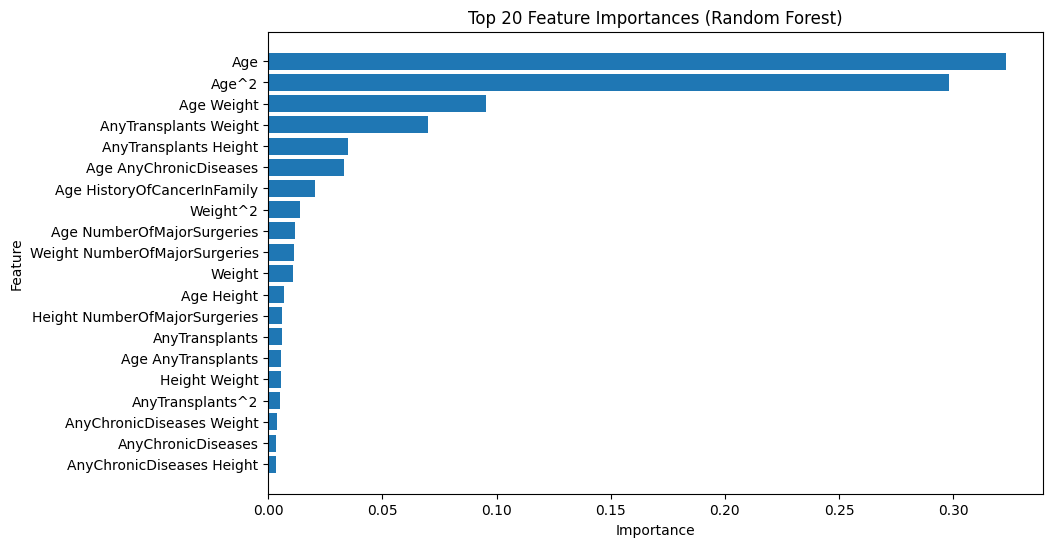

In [223]:
# Plot top n features
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'][::-1], top_features_df['Importance'][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {n} Feature Importances (Random Forest)')
plt.show()

In [224]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
gbdt_cv = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
gbdt_cv.fit(X_train_poly, y_train)

# Get best parameters and model
print("Best parameters:", gbdt_cv.best_params_)
gbdt_best = gbdt_cv.best_estimator_

# Evaluate the best model on validation set
y_val_pred_gbdt_best = gbdt_best.predict(X_val_poly)
r2_val_gbdt_best = r2_score(y_val, y_val_pred_gbdt_best)
print("Validation R² with best GBDT model:", r2_val_gbdt_best)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Validation R² with best GBDT model: 0.8304394530218842


In [225]:
# Predict on the test set
y_test_pred_gbdt = gbdt_best.predict(X_test_poly)

# Evaluate test performance
mae_test_gbdt = mean_absolute_error(y_test, y_test_pred_gbdt)
rmse_test_gbdt = mean_squared_error(y_test, y_test_pred_gbdt) ** 0.5
r2_test_gbdt = r2_score(y_test, y_test_pred_gbdt)

print("\nTest Dataset Performance (GBDT):")
print(f"Mean Absolute Error (MAE): {mae_test_gbdt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_gbdt:.2f}")
print(f"R-squared (R²): {r2_test_gbdt:.2f}")



Test Dataset Performance (GBDT):
Mean Absolute Error (MAE): 1312.33
Root Mean Squared Error (RMSE): 3299.46
R-squared (R²): 0.71


In [226]:
# Get feature importances
feature_importances = rf_best.feature_importances_
feature_names = poly.get_feature_names_out(X_train.columns)  # For polynomial features

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\nTop 10 Important Features:")
print(importance_df.head(10))



Top 10 Important Features:
                        Feature  Importance
10                        Age^2    0.359593
0                           Age    0.298269
40        AnyTransplants Weight    0.076053
16                   Age Weight    0.061988
39        AnyTransplants Height    0.036300
14       Age AnyChronicDiseases    0.031244
18  Age HistoryOfCancerInFamily    0.019098
19   Age NumberOfMajorSurgeries    0.016190
55                     Weight^2    0.015318
6                        Weight    0.013677


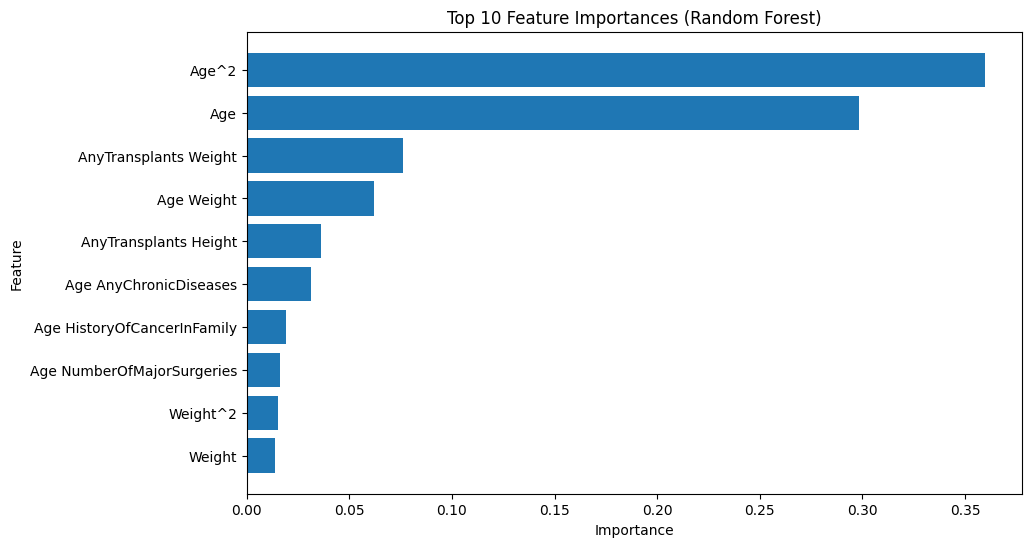

In [227]:
# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])  # Reverse for descending order
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

In [228]:
# Save feature importances to a CSV file
importance_df.to_csv('feature_importances_rf.csv', index=False)
print("Feature importances saved to 'feature_importances_rf.csv'.")

Feature importances saved to 'feature_importances_rf.csv'.


In [229]:
# Save the model and transformer in a single file
with open('random_forest_with_poly1.pkl', 'wb') as file:
    pickle.dump({'model': rf_best, 'poly_transformer': poly}, file)

print("Model and transformer saved as 'random_forest_with_poly1.pkl'.")

Model and transformer saved as 'random_forest_with_poly1.pkl'.


In [230]:
# Predict on the test set using rf_best
y_test_pred_rf = rf_best.predict(X_test_poly)

# Calculate residuals
residuals_rf = y_test - y_test_pred_rf

# Combine actuals, predictions, and residuals into a DataFrame for analysis
import pandas as pd
residuals_df_rf = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_rf,
    'Residual': residuals_rf
})

In [231]:
print("\nSummary Statistics of Residuals (Random Forest):")
print(residuals_rf.describe())


Summary Statistics of Residuals (Random Forest):
count      143.000000
mean     -7183.159977
std       7144.374520
min     -20009.151961
25%     -11835.297543
50%      -5931.159725
75%      -1130.647820
max       6068.840275
Name: PremiumPrice, dtype: float64


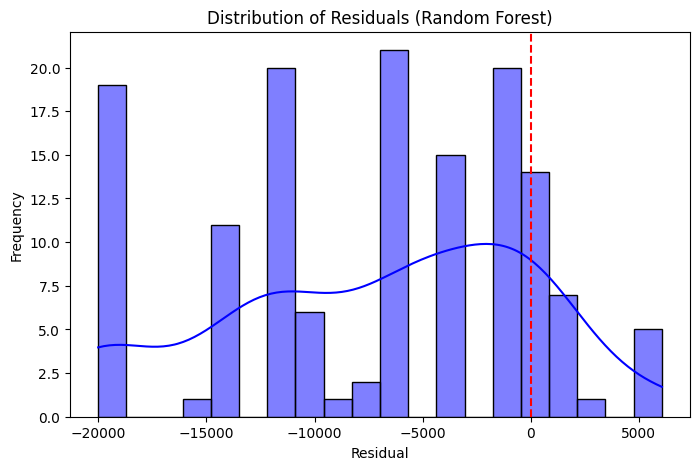

In [232]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, kde=True, bins=20, color="blue")
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

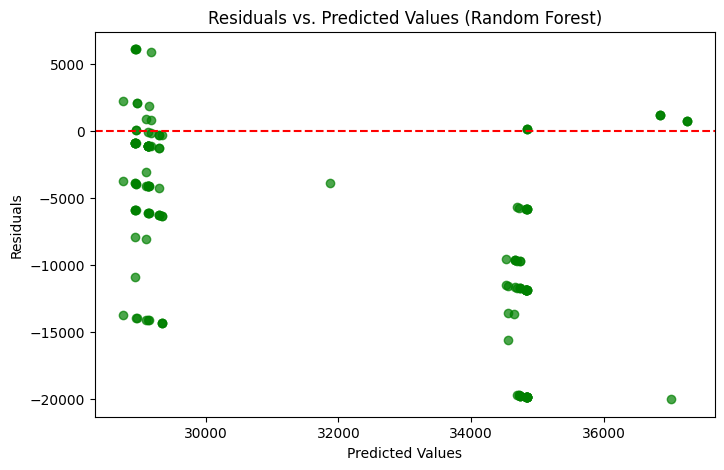

In [233]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred_rf, residuals_rf, alpha=0.7, color="green")
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

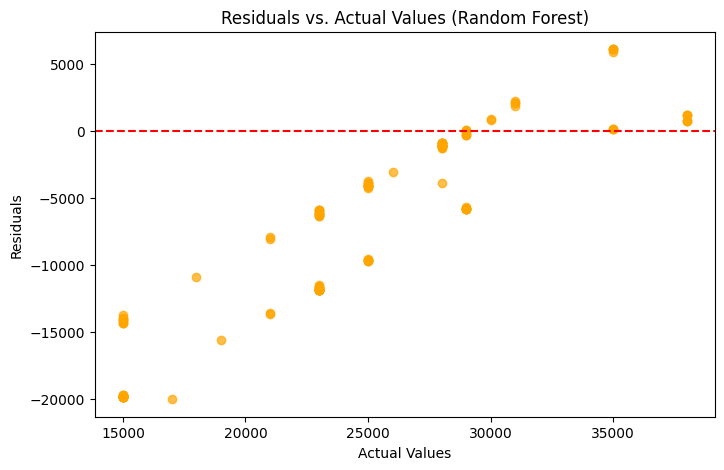

In [234]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals_rf, alpha=0.7, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Actual Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [235]:
# Identify the top residuals
top_residuals_rf = residuals_df_rf.sort_values(by='Residual', key=abs, ascending=False).head(30)

print("\nTop 10 Largest Residuals (Random Forest):")
print(top_residuals_rf)


Top 10 Largest Residuals (Random Forest):
     Actual     Predicted      Residual
978   17000  37009.151961 -20009.151961
33    15000  34839.964209 -19839.964209
123   15000  34839.964209 -19839.964209
914   15000  34839.964209 -19839.964209
968   15000  34839.964209 -19839.964209
647   15000  34839.964209 -19839.964209
856   15000  34839.964209 -19839.964209
835   15000  34839.964209 -19839.964209
665   15000  34839.964209 -19839.964209
374   15000  34835.297543 -19835.297543
325   15000  34835.297543 -19835.297543
7     15000  34827.880876 -19827.880876
250   15000  34738.682158 -19738.682158
617   15000  34738.682158 -19738.682158
761   15000  34738.682158 -19738.682158
428   15000  34738.682158 -19738.682158
103   15000  34726.598825 -19726.598825
810   15000  34726.598825 -19726.598825
593   15000  34699.015491 -19699.015491
386   19000  34564.289301 -15564.289301
596   15000  29341.929871 -14341.929871
573   15000  29341.929871 -14341.929871
30    15000  29341.929871 -14341.9298

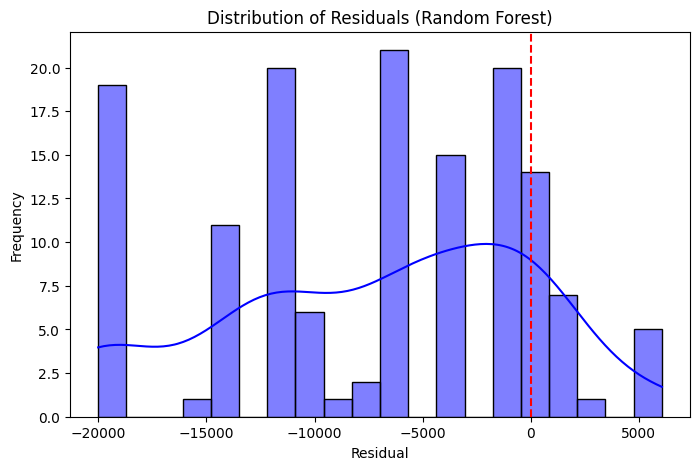

In [236]:
# Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, kde=True, bins=20, color="blue")
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

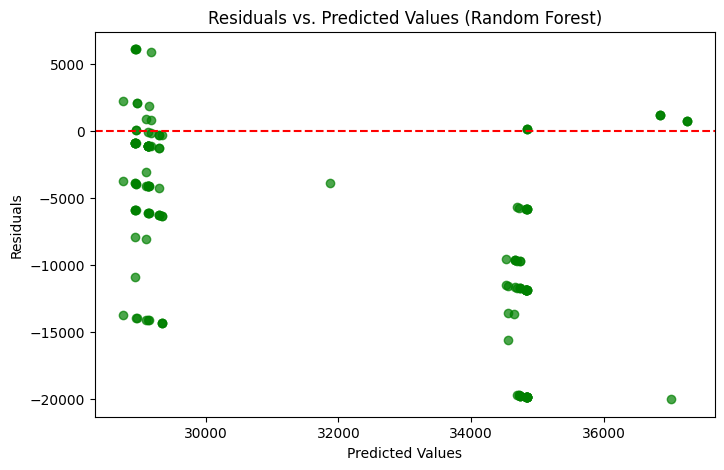

In [237]:
# Residuals vs. Predicted Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred_rf, residuals_rf, alpha=0.7, color="green")
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


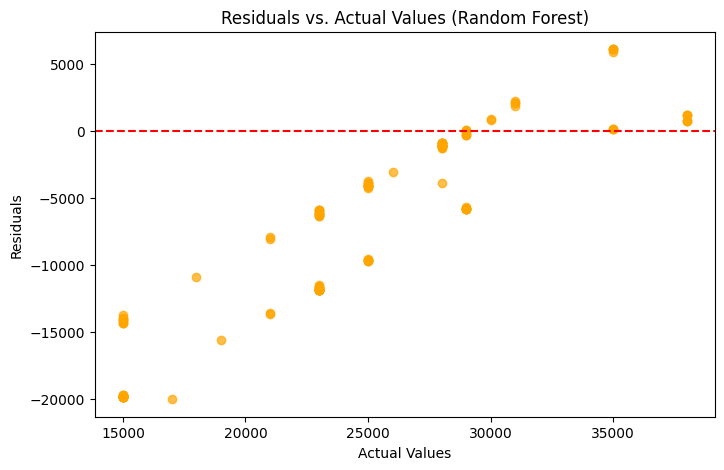

In [238]:
# Residuals vs. Actual Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals_rf, alpha=0.7, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Actual Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

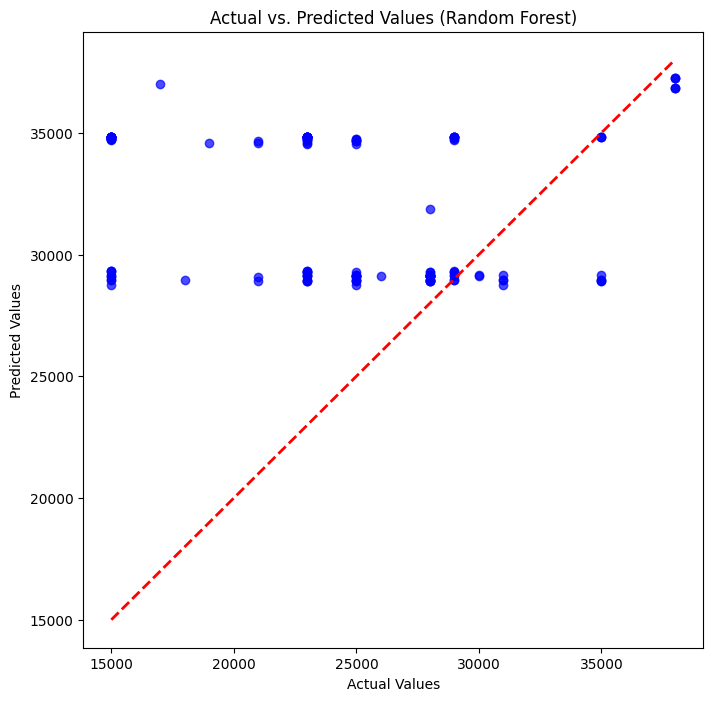

In [239]:
# Actual vs. Predicted Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred_rf, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

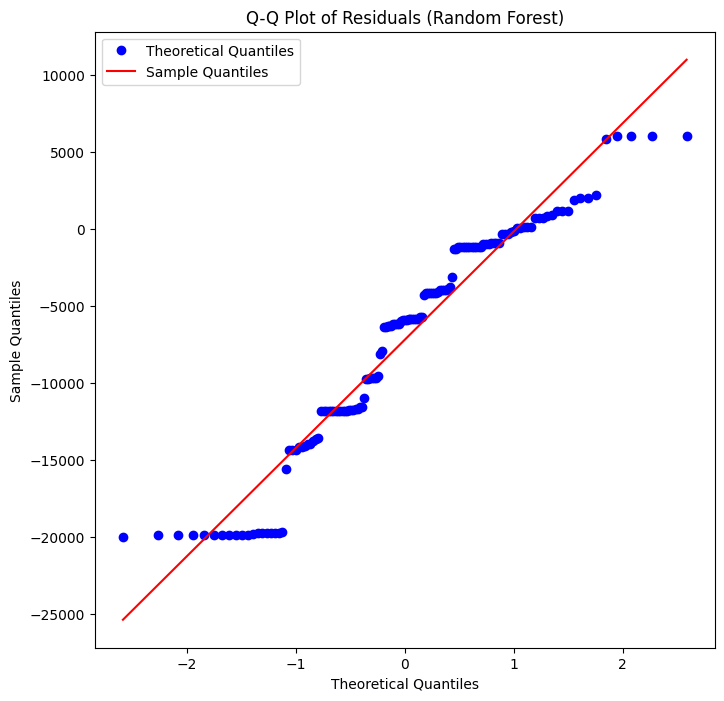

In [240]:
import scipy.stats as stats

# Q-Q plot for residuals
plt.figure(figsize=(8, 8))
res = stats.probplot(residuals_rf, dist="norm", plot=plt)

# Add a legend
plt.legend(["Theoretical Quantiles", "Sample Quantiles"], loc="best")
plt.title('Q-Q Plot of Residuals (Random Forest)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [241]:
# pip install shap

In [242]:
import shap

In [243]:
# Initialize the SHAP explainer for tree-based models
explainer = shap.TreeExplainer(rf_best)


In [244]:
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_poly)


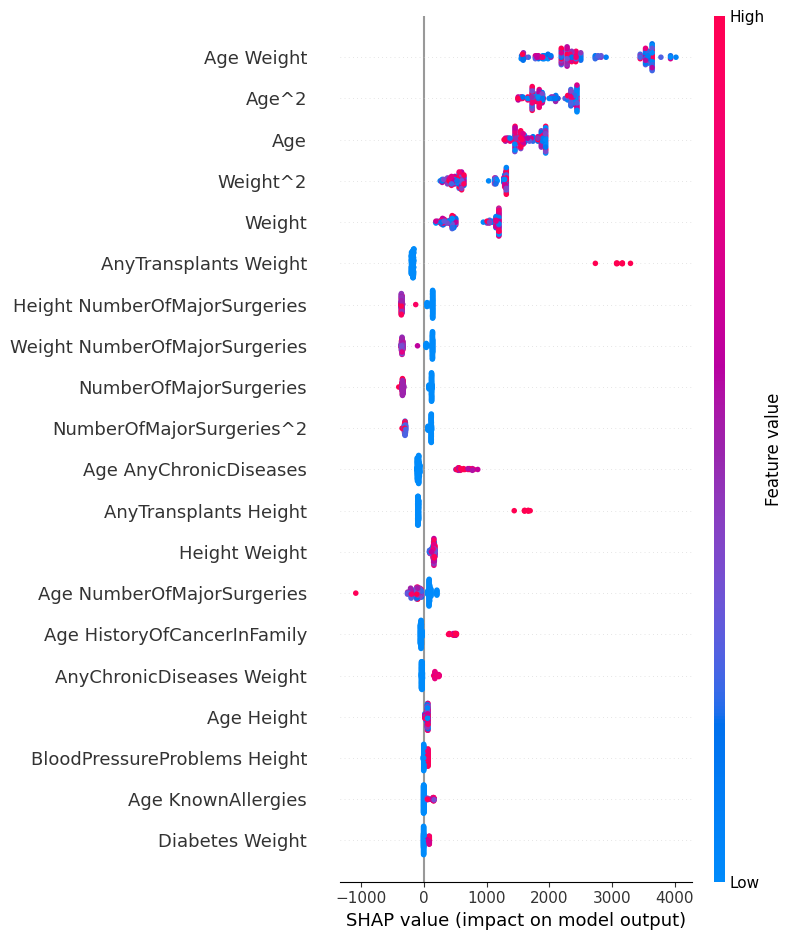

In [245]:
# Visualize global feature importance (summary plot)
shap.summary_plot(shap_values, X_test_poly, feature_names=poly.get_feature_names_out(X_train.columns))

In [246]:
shap.initjs()


In [256]:
# Define a wider parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000],  # Regularization strengths
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solvers supported by Ridge
}

In [257]:
# Initialize Ridge Regression model
ridge_model = Ridge()

# Set up GridSearchCV
ridge_cv = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    scoring='r2',   # Use R² as the evaluation metric
    cv=5,           # 5-fold cross-validation
    verbose=1,      # Display progress
    n_jobs=-1       # Use all available cores
)

# Fit GridSearchCV on the training data
ridge_cv.fit(X_train_poly, y_train)

# Get the best hyperparameters and the corresponding R² score
best_params = ridge_cv.best_params_
best_r2 = ridge_cv.best_score_

print(f"Best parameters: {best_params}")
print(f"Best R² from cross-validation: {best_r2:.4f}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters: {'alpha': 0.1, 'solver': 'svd'}
Best R² from cross-validation: 0.7388


In [258]:
# Get the best model
ridge_best = ridge_cv.best_estimator_

# Predict on the validation set
y_val_pred_ridge = ridge_best.predict(X_val_poly)

# Evaluate performance
mae_val = mean_absolute_error(y_val, y_val_pred_ridge)
rmse_val = mean_squared_error(y_val, y_val_pred_ridge) ** 0.5
r2_val = r2_score(y_val, y_val_pred_ridge)

print("\nValidation Dataset Performance (Best Ridge Model):")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared (R²): {r2_val:.4f}")


Validation Dataset Performance (Best Ridge Model):
Mean Absolute Error (MAE): 2389.24
Root Mean Squared Error (RMSE): 3367.56
R-squared (R²): 0.6879


In [259]:
# Predict on the test set
y_test_pred_ridge = ridge_best.predict(X_test_poly)

# Evaluate test performance
mae_test = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_test = mean_squared_error(y_test, y_test_pred_ridge) ** 0.5
r2_test = r2_score(y_test, y_test_pred_ridge)

print("\nTest Dataset Performance (Best Ridge Model):")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.4f}")


Test Dataset Performance (Best Ridge Model):
Mean Absolute Error (MAE): 2305.48
Root Mean Squared Error (RMSE): 3298.59
R-squared (R²): 0.7149


In [260]:
# Predict on the training set
y_train_pred_ridge = ridge_best.predict(X_train_poly)

# Calculate metrics
r2_train = r2_score(y_train, y_train_pred_ridge)
mae_train = mean_absolute_error(y_train, y_train_pred_ridge)
rmse_train = mean_squared_error(y_train, y_train_pred_ridge) ** 0.5

# Display results
print("\nTraining Dataset Performance (Best Ridge Model):")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")


Training Dataset Performance (Best Ridge Model):
R-squared (R²): 0.8040
Mean Absolute Error (MAE): 2036.94
Root Mean Squared Error (RMSE): 2732.75


In [261]:
# Create a DataFrame with X_train, Y_train (actual), Random Forest predictions, and Ridge predictions
train_output_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X_train.columns))
train_output_df['Actual_PremiumPrice'] = y_train.values
train_output_df['Predicted_RF_PremiumPrice'] = y_train_pred_rf
train_output_df['Predicted_Ridge_PremiumPrice'] = y_train_pred_ridge

# Save the DataFrame to an Excel file
output_path = "training_data_with_predictions_rf_ridge.xlsx"
train_output_df.to_excel(output_path, index=False)

print(f"Excel file saved at: {output_path}")

Excel file saved at: training_data_with_predictions_rf_ridge.xlsx


In [262]:
# Validation dataset
val_output_df = pd.DataFrame(X_val_poly, columns=poly.get_feature_names_out(X_train.columns))
val_output_df['Actual_PremiumPrice'] = y_val.values
val_output_df['Predicted_RF_PremiumPrice'] = y_val_pred_rf
val_output_df['Predicted_Ridge_PremiumPrice'] = y_val_pred_ridge

# Save validation dataset to Excel
val_output_path = "validation_data_with_predictions_rf_ridge.xlsx"
val_output_df.to_excel(val_output_path, index=False)
print(f"Validation dataset saved at: {val_output_path}")

# Test dataset
test_output_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_train.columns))
test_output_df['Actual_PremiumPrice'] = y_test.values
test_output_df['Predicted_RF_PremiumPrice'] = y_test_pred_rf
test_output_df['Predicted_Ridge_PremiumPrice'] = y_test_pred_ridge

# Save test dataset to Excel
test_output_path = "test_data_with_predictions_rf_ridge.xlsx"
test_output_df.to_excel(test_output_path, index=False)
print(f"Test dataset saved at: {test_output_path}")

Validation dataset saved at: validation_data_with_predictions_rf_ridge.xlsx
Test dataset saved at: test_data_with_predictions_rf_ridge.xlsx


In [263]:
df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries        BMI BMI_Binned  PremiumPrice  
0                       0  23.725286     Normal         25000  
1                       0  22.530864     Normal         29000  
2                       1  23.634033     Normal         23000  
3                       2  27.770313   o_weight         28000  
4                       1  31.934969     obese1         23000

In [264]:
# Define features (X) and target (y)
X = df.drop(columns=['PremiumPrice'])  # Features
y = df['PremiumPrice']  # Target variable

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (664, 12), Validation set: (142, 12), Test set: (143, 12)


In [ ]:
# Initialize Random Forest
rf_model_unscaled = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Let trees grow fully
    random_state=42,       # For reproducibility
    min_samples_split=2,   # Minimum samples to split a node
    min_samples_leaf=1     # Minimum samples per leaf
)

# Train the model on unscaled training data
rf_model_unscaled.fit(X_train, y_train)

# Predict on training, validation, and test datasets
y_train_pred_rf = rf_model_unscaled.predict(X_train)
y_val_pred_rf = rf_model_unscaled.predict(X_val)
y_test_pred_rf = rf_model_unscaled.predict(X_test)

In [ ]:
# Evaluate on training set
r2_train = r2_score(y_train, y_train_pred_rf)
mae_train = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train = mean_squared_error(y_train, y_train_pred_rf) ** 0.5

# Evaluate on validation set
r2_val = r2_score(y_val, y_val_pred_rf)
mae_val = mean_absolute_error(y_val, y_val_pred_rf)
rmse_val = mean_squared_error(y_val, y_val_pred_rf) ** 0.5

# Evaluate on test set
r2_test = r2_score(y_test, y_test_pred_rf)
mae_test = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test = mean_squared_error(y_test, y_test_pred_rf) ** 0.5

# Print results
print("\nTraining Performance (Unscaled):")
print(f"R-squared (R²): {r2_train:.2f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")

print("\nValidation Performance (Unscaled):")
print(f"R-squared (R²): {r2_val:.2f}, MAE: {mae_val:.2f}, RMSE: {rmse_val:.2f}")

print("\nTest Performance (Unscaled):")
print(f"R-squared (R²): {r2_test:.2f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")


In [ ]:
# Get feature importances
feature_importances = rf_model_unscaled.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

In [ ]:
# Initialize PolynomialFeatures (degree 2, no bias term)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Generate polynomial features for training, validation, and test sets
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Get feature names for polynomial features
poly_feature_names = poly.get_feature_names_out(X_train.columns)
print(f"Number of features after polynomial transformation: {len(poly_feature_names)}")

In [ ]:
# Initialize Random Forest Regressor
rf_model_poly = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Let trees grow fully
    random_state=42,       # For reproducibility
    min_samples_split=2,   # Minimum samples to split a node
    min_samples_leaf=1     # Minimum samples per leaf
)

# Train the model on polynomial features
rf_model_poly.fit(X_train_poly, y_train)

# Predict on training, validation, and test sets
y_train_pred_rf_poly = rf_model_poly.predict(X_train_poly)
y_val_pred_rf_poly = rf_model_poly.predict(X_val_poly)
y_test_pred_rf_poly = rf_model_poly.predict(X_test_poly)


In [ ]:
# Evaluate on training set
r2_train = r2_score(y_train, y_train_pred_rf_poly)
mae_train = mean_absolute_error(y_train, y_train_pred_rf_poly)
rmse_train = mean_squared_error(y_train, y_train_pred_rf_poly) ** 0.5

# Evaluate on validation set
r2_val = r2_score(y_val, y_val_pred_rf_poly)
mae_val = mean_absolute_error(y_val, y_val_pred_rf_poly)
rmse_val = mean_squared_error(y_val, y_val_pred_rf_poly) ** 0.5

# Evaluate on test set
r2_test = r2_score(y_test, y_test_pred_rf_poly)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_poly)
rmse_test = mean_squared_error(y_test, y_test_pred_rf_poly) ** 0.5

# Print results
print("\nTraining Performance (Polynomial Features):")
print(f"R-squared (R²): {r2_train:.2f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")

print("\nValidation Performance (Polynomial Features):")
print(f"R-squared (R²): {r2_val:.2f}, MAE: {mae_val:.2f}, RMSE: {rmse_val:.2f}")

print("\nTest Performance (Polynomial Features):")
print(f"R-squared (R²): {r2_test:.2f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")


In [ ]:
# Get feature importances
feature_importances = rf_model_poly.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest with Polynomial Features)')
plt.show()


In [ ]:
# Save the model and transformer
with open('random_forest_poly_model.pkl', 'wb') as file:
    pickle.dump({'model': rf_model_poly, 'poly_transformer': poly}, file)

print("Model and transformer saved as 'random_forest_poly_model.pkl'.")

### Hyper parameter tuning on Random Forest model

In [ ]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required at a leaf node
}

In [ ]:
# Initialize Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
rf_cv = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',       # Use R² as the evaluation metric
    cv=5,               # 5-fold cross-validation
    verbose=1,          # Display progress
    n_jobs=-1           # Use all available processors
)

# Fit GridSearchCV on the training data (polynomial features)
rf_cv.fit(X_train_poly, y_train)

# Get the best parameters and corresponding R² score
best_params = rf_cv.best_params_
best_r2 = rf_cv.best_score_

print(f"Best parameters: {best_params}")
print(f"Best R² from cross-validation: {best_r2:.4f}")


In [ ]:

# Use the best model from GridSearchCV
rf_best_poly = rf_cv.best_estimator_

# Predict on validation set
y_val_pred_rf_best = rf_best_poly.predict(X_val_poly)
r2_val = r2_score(y_val, y_val_pred_rf_best)
mae_val = mean_absolute_error(y_val, y_val_pred_rf_best)
rmse_val = mean_squared_error(y_val, y_val_pred_rf_best) ** 0.5

print("\nValidation Performance (Best Random Forest Model):")
print(f"R-squared (R²): {r2_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")

# Predict on test set
y_test_pred_rf_best = rf_best_poly.predict(X_test_poly)
r2_test = r2_score(y_test, y_test_pred_rf_best)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_best)
rmse_test = mean_squared_error(y_test, y_test_pred_rf_best) ** 0.5

print("\nTest Performance (Best Random Forest Model):")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")


In [ ]:
# Calculate metrics for the training dataset using the tuned Random Forest model
r2_train_rf_best = r2_score(y_train, y_train_pred_rf_poly)
mae_train_rf_best = mean_absolute_error(y_train, y_train_pred_rf_poly)
rmse_train_rf_best = mean_squared_error(y_train, y_train_pred_rf_poly) ** 0.5

# Print training dataset performance
print("\nTrain Performance (Best Random Forest Model):")
print(f"R-squared (R²): {r2_train_rf_best:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_rf_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rf_best:.2f}")

In [ ]:
# Save the best Random Forest model and PolynomialFeatures transformer for deployment
with open('rf_best_poly_model_for_streamlit.pkl', 'wb') as file:
    pickle.dump({'model': rf_best_poly, 'poly_transformer': poly}, file)

print("\nBest model saved for deployment as 'rf_best_poly_model_for_streamlit.pkl'.")


In [ ]:
# Extract feature importance values from the model
feature_importances = rf_best_poly.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': poly.get_feature_names_out(X_train.columns),  # Feature names from PolynomialFeatures
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top n features
n = 20  # Set the number of top features to display
top_features_df = importance_df.head(n)

print(f"Top {n} Features by Importance:")
print(top_features_df)

In [ ]:
# Plot top n features
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'][::-1], top_features_df['Importance'][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {n} Feature Importances (Random Forest)')
plt.show()

In [ ]:
# Initialize PolynomialFeatures (degree 2, no bias term)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Generate polynomial features for training, validation, and test sets
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Get feature names for polynomial features
poly_feature_names = poly.get_feature_names_out(X_train.columns)
print(f"Number of features after polynomial transformation: {len(poly_feature_names)}")

#XGBOOST

In [355]:
!pip install scikit-learn --upgrade

In [354]:
!pip install xgboost --upgrade

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import datetime as dt

params = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

xgb = XGBClassifier(objective='multi:softmax', num_class=20, verbosity=1)
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)

start = dt.datetime.now()
random_search.fit(X_sm, y_train)
end = dt.datetime.now()


In [ ]:
res = random_search.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


In [ ]:
print(f"Time taken for fits : {end - start}")

In [ ]:
print(random_search.best_estimator_)

In [ ]:
xgb = random_search.best_estimator_

xgb.fit(X_train, y_train)

print("Model acc",xgb.score(X_test, y_test))

